<a href="https://colab.research.google.com/github/mmartin46/County-Health-Findings-Project/blob/main/Data_Science_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2022 County Health Findings Project

**Team Name: The Atlpydas**

**Team Members:**
*  Trevor Smith
*  Mitchell Martin
*  Eduardo Palacios

**Project Description:**

Analyze data set given by United Health Group(UHG) to determine
the impact on race, social and demographic factors on health,
survival, and mortality.

# Data Cleanup Process
General Questions -

When the dataset was first retrieved,
there were multiple unnamed columns so we had to
remove each the unamed columns within the dataset using the
**removed_unnamed() algorithm**, which basically
renames all the "Unnamed" headers to blank headers.

**Source:**
 https://stackoverflow.com/questions/40839609/rename-unnamed-multiindex-columns-in-pandas-dataframe


Predictive Modeling -
In order to use predictive modeling I had to remove
all the rows that didn't have an available value.


Ranked Data File CSV Dimensions: ( 3192 rows, 249 columns )

After Filtering (N/A) Dimensions: ( 454 rows, 8 columns )

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np

# Filters the dataset
Ends up fixing the columns within the .xlsx formatting

In [ ]:
import pandas as pd
import altair as alt
from altair import Chart, X, Y, Color, Scale

names = ['Outcomes & Factors Rankings', 'Outcomes & Factors SubRankings', 'Additional Measure Data', 'Ranked Measure Data']

def filter_dataset(name):
  """Cleans up our dataset"""
  rank_data = pd.read_excel('/content/2022 County Health Rankings Data - v1 (1).xlsx', sheet_name=name, header=[0, 1])

  return rank_data

all_data_sets = []

for i in range(4):
  all_data_sets.append(filter_dataset(names[i]))

ranks = all_data_sets[0]
sub_ranks = all_data_sets[1]
additional_data = all_data_sets[2]
ranked_data = all_data_sets[3]


# Do income inequality, unemployment and high school completion rates affect the number of premature deaths of certain racial groups at the county level?

**Do income inequality, unemployment and high school completion rates affect the number of premature deaths of certain racial groups at the county level?**

Premature: < 75 years of age

In [ ]:
import pandas as pd
import altair as alt
from altair import Chart, X, Y, Color, Scale

names = ['Outcomes & Factors Rankings', 'Outcomes & Factors SubRankings', 'Additional Measure Data', 'Ranked Measure Data']

def filter_dataset(name):
  """Cleans up our dataset"""
  rank_data = pd.read_excel('/content/drive/MyDrive/Dataset/2022 County Health Rankings Data - v1.xlsx', sheet_name=name, header=[0, 1])

  return rank_data

all_data_sets = []

for i in range(4):
  all_data_sets.append(filter_dataset(names[i]))

ranks = all_data_sets[0]
sub_ranks = all_data_sets[1]
additional_data = all_data_sets[2]
ranked_data = all_data_sets[3]

In [ ]:
import pandas as pd
import altair as alt
from altair import Chart, X, Y, Color, Scale


names = ['Outcomes & Factors Rankings', 'Outcomes & Factors SubRankings', 'Additional Measure Data', 'Ranked Measure Data']

def filter_dataset(name):
  """Cleans up our dataset"""
  rank_data = pd.read_excel('/content/drive/MyDrive/Dataset/2022 County Health Rankings Data - v1.xlsx', sheet_name=name, header=[0, 1])

  return rank_data

all_data_sets = []

for i in range(4):
  all_data_sets.append(filter_dataset(names[i]))

ranks = all_data_sets[0]
sub_ranks = all_data_sets[1]
additional_data = all_data_sets[2]
ranked_data = all_data_sets[3]

In [ ]:
states =list(ranked_data['Location']['State'])
county =list(ranked_data['Location']['County'])
county

In [ ]:
aian_premature_death_data = list(ranked_data['Premature death']['YPLL Rate (AIAN)'])
asian_premature_death_data = list(ranked_data['Premature death']['YPLL Rate (Asian)'])
black_premature_death_data = list(ranked_data['Premature death']['YPLL Rate (Black)'])
hispanic_premature_death_data = list(ranked_data['Premature death']['YPLL Rate (Hispanic)'])
white_premature_death_data = list(ranked_data['Premature death']['YPLL Rate (white)'])

# Income Inequality

**Income Ratio = 80th pecentile: 20th percentile of incomes**

In [ ]:
income_inequality_data = list(ranked_data['Income inequality']['Income Ratio'])

In [ ]:
aian_p_to_income = pd.DataFrame({'Income Percentile Ratio - 80%:20%': income_inequality_data, 'American Indian and Alaska Native YPLL Rate': aian_premature_death_data})
aian_p_to_income.insert(0,'Race','American Indian and Alaska Native')
aian_p_to_income.insert(0,'State',states)
aian_p_to_income.insert(0,'State',county)
aian_p_to_income = aian_p_to_income.loc[aian_p_to_income['State'] == 'Texas']
dom = ['American Indian and Alaska Native']
rng = ['#FFFF00']
income_inequality_a = Chart(aian_p_to_income).mark_circle().encode(x='Income Percentile Ratio - 80%:20%',y='American Indian and Alaska Native YPLL Rate', color=alt.Color('Race',scale = alt.Scale(domain=dom,range=rng)))

In [ ]:
asian_p_to_income = pd.DataFrame({'Income Percentile Ratio - 80%:20%': income_inequality_data, 'Asian YPLL Rate': asian_premature_death_data})
asian_p_to_income.insert(0,'Race','Asian')
asian_p_to_income.insert(0,'State',states)
asian_p_to_income = asian_p_to_income.loc[asian_p_to_income['State'] == 'Texas']
dom = ['Asian']
rng = ['#FF0000']
income_inequality_b = Chart(asian_p_to_income).mark_circle().encode(x='Income Percentile Ratio - 80%:20%',y='Asian YPLL Rate', color=alt.Color('Race',scale = alt.Scale(domain =dom,range=rng)))

In [ ]:
black_p_to_income = pd.DataFrame({'Income Percentile Ratio - 80%:20%': income_inequality_data, 'Black YPLL Rate': black_premature_death_data})
black_p_to_income.insert(0,'Race','Black')
black_p_to_income.insert(0,'State',states)
black_p_to_income = black_p_to_income.loc[black_p_to_income['State'] == 'Texas']
dom = ['Black']
rng = ['#00FF00']
income_inequality_c = Chart(black_p_to_income).mark_circle().encode(x='Income Percentile Ratio - 80%:20%',y='Black YPLL Rate', color=alt.Color('Race', scale = alt.Scale(domain=dom,range=rng))).interactive()

In [ ]:
hispanic_p_to_income = pd.DataFrame({'Income Percentile Ratio - 80%:20%': income_inequality_data, 'Hispanic YPLL Rate': hispanic_premature_death_data})
hispanic_p_to_income.insert(0,'Race','Hispanic')
hispanic_p_to_income.insert(0,'State',states)
hispanic_p_to_income = hispanic_p_to_income.loc[hispanic_p_to_income['State'] == 'Texas']
dom = ['Hispanic']
rng = ['#0000FF']
income_inequality_d = Chart(hispanic_p_to_income).mark_circle().encode(x='Income Percentile Ratio - 80%:20%',y='Hispanic YPLL Rate', color=alt.Color('Race',scale = alt.Scale(domain=dom,range=rng))).interactive()

In [ ]:
white_p_to_income = pd.DataFrame({'Income Percentile Ratio - 80%:20%': income_inequality_data, 'White YPLL Rate': white_premature_death_data})
white_p_to_income.insert(0,'Race','White')
white_p_to_income.insert(0,'State', states)
white_p_to_income = white_p_to_income.loc[white_p_to_income['State'] == 'Texas']
dom = ['White']
rng = ['#FF00FF']
income_inequality_e = Chart(white_p_to_income).mark_circle().encode(x='Income Percentile Ratio - 80%:20%',y='White YPLL Rate', color=alt.Color('Race',scale = alt.Scale(domain=dom,range=rng))).interactive()

In [ ]:
income_inequality_final = alt.layer(income_inequality_b,income_inequality_c,income_inequality_e,income_inequality_d,income_inequality_a).resolve_scale(color='independent').configure_mark(opacity=0.5).interactive()
income_inequality_final

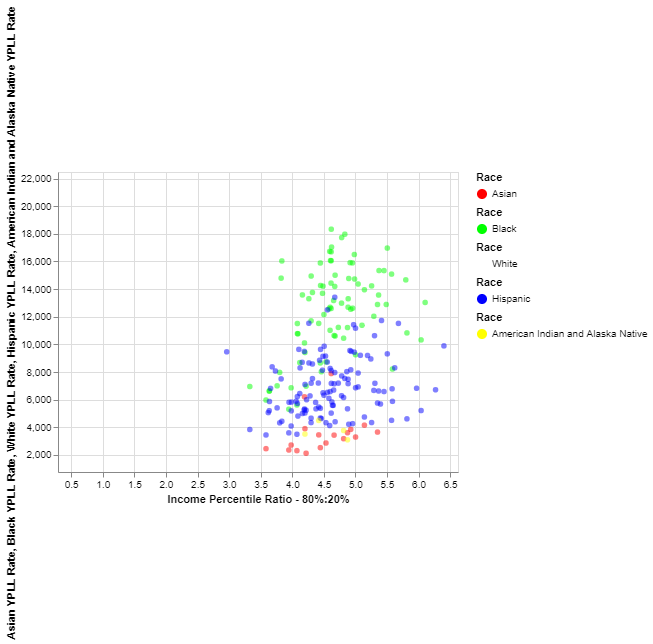

# Highschool Graduation

In [ ]:
highschool_grad_data = list(ranked_data['High school completion']['% Completed High School'])

In [ ]:
aian_p_to_grad = pd.DataFrame({'% Population Completed High School': highschool_grad_data, 'American Indian and Alaska Native YPLL Rate': aian_premature_death_data})
aian_p_to_grad.insert(0,'Race','American Indian and Alaska Native')
aian_p_to_grad.insert(0,'State',states)
aian_p_to_grad = aian_p_to_grad.loc[aian_p_to_grad['State'] == 'Texas']
dom = ['American Indian and Alaska Native']
rng = ['#FFFF00']
grad_a = Chart(aian_p_to_grad).mark_circle().encode(x='% Population Completed High School',y='American Indian and Alaska Native YPLL Rate', color=alt.Color('Race',scale=alt.Scale(domain=dom,range=rng)))

In [ ]:
asian_p_to_grad = pd.DataFrame({'% Population Completed High School': highschool_grad_data, 'Asian YPLL Rate': asian_premature_death_data})
asian_p_to_grad.insert(0,'Race','Asian')
asian_p_to_grad.insert(0,'State', states)
asian_p_to_grad = asian_p_to_grad.loc[asian_p_to_grad['State'] == 'Texas']
dom = ['Asian']
rng = ['#FF0000']
grad_b = Chart(asian_p_to_grad).mark_circle().encode(x='% Population Completed High School',y='Asian YPLL Rate', color=alt.Color('Race',scale=alt.Scale(domain=dom,range=rng)))

In [ ]:
black_p_to_grad = pd.DataFrame({'% Population Completed High School': highschool_grad_data, 'Black YPLL Rate': black_premature_death_data})
black_p_to_grad.insert(0,'Race','Black')
black_p_to_grad.insert(0,'State', states)
black_p_to_grad = black_p_to_grad.loc[black_p_to_grad['State'] == 'Texas']
dom = ['Black']
rng = ['#00FF00']
grad_c = Chart(black_p_to_grad).mark_circle().encode(x='% Population Completed High School',y='Black YPLL Rate', color=alt.Color('Race',scale=alt.Scale(domain=dom,range=rng)))

In [ ]:
hispanic_p_to_grad = pd.DataFrame({'% Population Completed High School': highschool_grad_data, 'Hispanic YPLL Rate': hispanic_premature_death_data})
hispanic_p_to_grad.insert(0,'Race','Hispanic')
hispanic_p_to_grad.insert(0,'State', states)
hispanic_p_to_grad = hispanic_p_to_grad.loc[hispanic_p_to_grad['State'] == 'Texas']
dom = ['Hispanic']
rng = ['#0000FF']
grad_d = Chart(hispanic_p_to_grad).mark_circle().encode(x='% Population Completed High School',y='Hispanic YPLL Rate', color=alt.Color('Race',scale=alt.Scale(domain=dom,range=rng)))

In [ ]:
white_p_to_grad = pd.DataFrame({'% Population Completed High School': highschool_grad_data, 'White YPLL Rate': white_premature_death_data})
white_p_to_grad.insert(0,'Race','White')
white_p_to_grad.insert(0,'State',states)
white_p_to_grad = white_p_to_grad.loc[white_p_to_grad['State'] == 'Texas']
dom = ['White']
rng = ['#FF00FF']
grad_e = Chart(white_p_to_grad).mark_circle().encode(x='% Population Completed High School',y='White YPLL Rate', color=alt.Color('Race',scale=alt.Scale(domain=dom,range=rng)))

In [ ]:
grad_final = alt.layer(grad_a,grad_c,grad_e,grad_d,grad_b).resolve_scale(color='independent').configure_mark(opacity=0.5).interactive()
grad_final

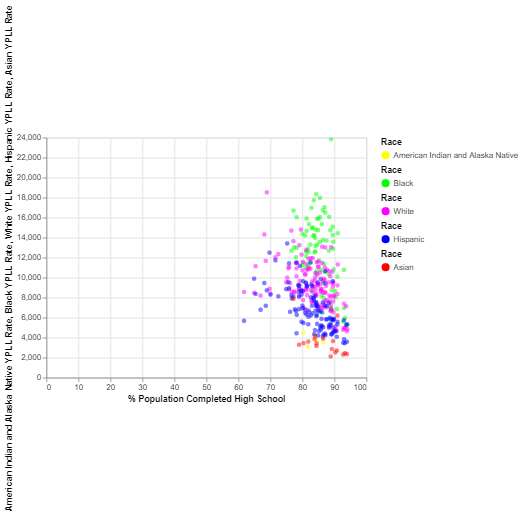

# Unemployment

In [ ]:
unemployment_data = list(ranked_data['Unemployment']['% Unemployed'])

In [ ]:
aian_p_to_unemployment = pd.DataFrame({'% Unemployed': unemployment_data, 'American Indian and Alaska Native YPLL Rate': aian_premature_death_data})
aian_p_to_unemployment.insert(0,'Race','American Indian and Alaska Native')
aian_p_to_unemployment.insert(0,'State',states)
aian_p_to_unemployment = aian_p_to_unemployment.loc[aian_p_to_unemployment['State'] == 'Texas']
dom = ['American Indian and Alaska Native']
rng = ['#FFFF00']
unemp_a = Chart(aian_p_to_unemployment).mark_circle().encode(x='% Unemployed',y='American Indian and Alaska Native YPLL Rate', color=alt.Color('Race',scale=alt.Scale(domain=dom,range=rng)))

In [ ]:
asian_p_to_unemployment = pd.DataFrame({'% Unemployed': unemployment_data, 'Asian YPLL Rate': asian_premature_death_data})
asian_p_to_unemployment.insert(0,'Race','Asian')
asian_p_to_unemployment.insert(0,'State',states)
asian_p_to_unemployment = asian_p_to_unemployment.loc[asian_p_to_unemployment['State'] == 'Texas']
dom = ['Asian']
rng = ['#FF0000']
unemp_b = Chart(asian_p_to_unemployment).mark_circle().encode(x='% Unemployed',y='Asian YPLL Rate', color=alt.Color('Race',scale=alt.Scale(domain=dom,range=rng)))

In [ ]:
black_p_to_unemployment = pd.DataFrame({'% Unemployed': unemployment_data, 'Black YPLL Rate': black_premature_death_data})
black_p_to_unemployment.insert(0,'Race','Black')
black_p_to_unemployment.insert(0,'State',states)
black_p_to_unemployment = black_p_to_unemployment.loc[black_p_to_unemployment['State'] == 'Texas']
dom = ['Black']
rng = ['#00FF00']
unemp_c = Chart(black_p_to_unemployment).mark_circle().encode(x='% Unemployed',y='Black YPLL Rate', color=alt.Color('Race',scale=alt.Scale(domain=dom,range=rng)))

In [ ]:
hispanic_p_to_unemployment = pd.DataFrame({'% Unemployed': unemployment_data, 'Hispanic YPLL Rate': hispanic_premature_death_data})
hispanic_p_to_unemployment.insert(0,'Race','Hispanic')
hispanic_p_to_unemployment.insert(0,'State',states)
hispanic_p_to_unemployment = hispanic_p_to_unemployment.loc[hispanic_p_to_unemployment['State'] == 'Texas']
dom = ['Hispanic']
rng = ['#0000FF']
unemp_d = Chart(hispanic_p_to_unemployment).mark_circle().encode(x='% Unemployed',y='Hispanic YPLL Rate', color=alt.Color('Race',scale=alt.Scale(domain=dom,range=rng)))

In [ ]:
white_p_to_unemployment = pd.DataFrame({'% Unemployed': unemployment_data, 'White YPLL Rate': white_premature_death_data})
white_p_to_unemployment.insert(0,'Race','White')
white_p_to_unemployment.insert(0,'State', states)
white_p_to_unemployment = white_p_to_unemployment.loc[white_p_to_unemployment['State'] == 'Texas']
dom = ['White']
rng = ['#FF00FF']
unemp_e = Chart(white_p_to_unemployment).mark_circle().encode(x='% Unemployed',y='White YPLL Rate', color=alt.Color('Race',scale=alt.Scale(domain=dom,range=rng)))

In [ ]:
unemp_final = alt.layer(unemp_a,unemp_b,unemp_c,unemp_d,unemp_e).resolve_scale(color='independent').configure_mark(opacity=0.5).interactive()
unemp_final

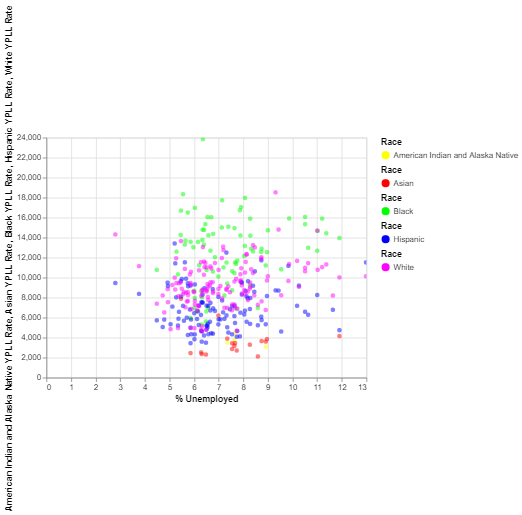

In [ ]:
social_factors_heatmap = pd.DataFrame({'Income Percentile Ratio - 80%:20%': income_inequality_data,'% Population Unemployed':unemployment_data,'High School Completion Rate':highschool_grad_data, 'American Indian and Alaska Native': aian_premature_death_data,'Asian':asian_premature_death_data,'Black':black_premature_death_data,'White':white_premature_death_data,'Hispanic':hispanic_premature_death_data})

In [ ]:
# Code Snippet From https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = social_factors_heatmap.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

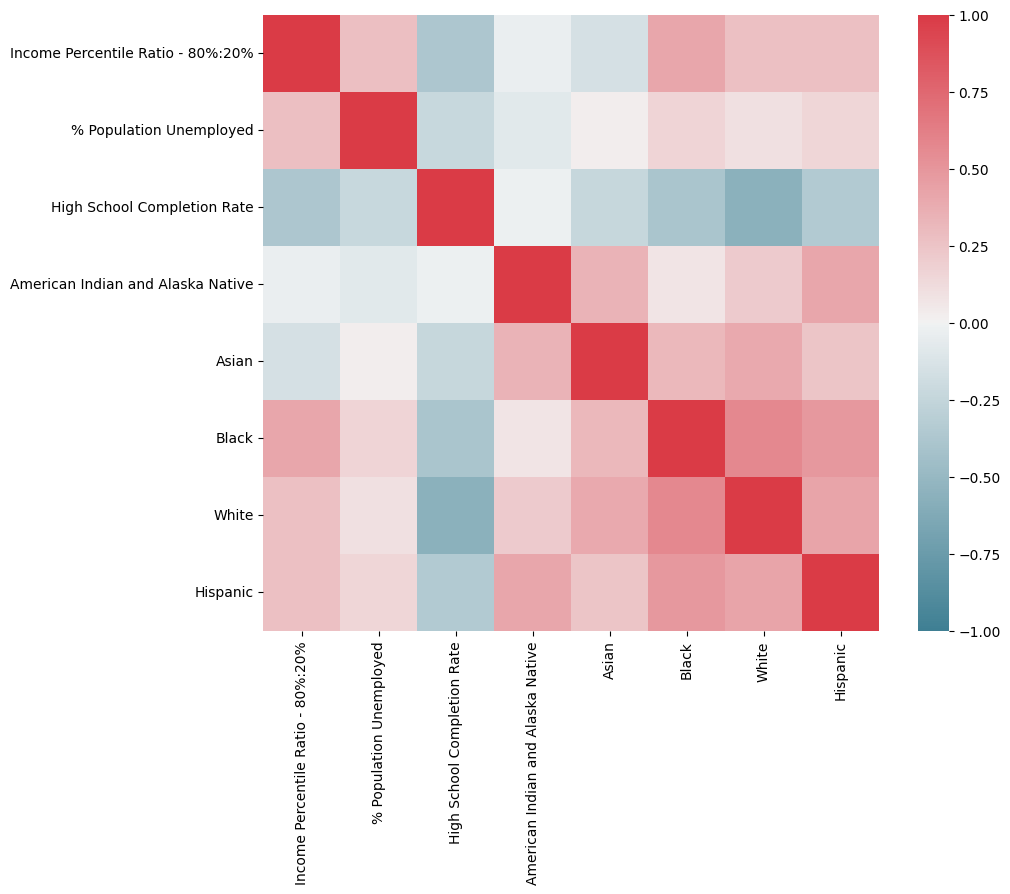

# Which 5 States have the counties with lowest mental health days, and do 
# excessive drinking ratings lead to larger amounts of people having poor mental 
# health days?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import altair as alt
from altair import Chart, X, Y, Color, Scale
from vega_datasets import data
import numpy as np

In [ ]:
def remove_unnamed(df):
  """Solution found on https://stackoverflow.com/questions/40839609/rename-unnamed-multiindex-columns-in-pandas-dataframe"""
  for i, columns in enumerate(df.columns.levels):
    new_columns = columns.tolist()
    for j, row in enumerate(new_columns):
      if "Unnamed: " in row:
        new_columns[j] = ""
    if pd.__version__ < "0.21.0":
      df.columns.set_levels(new_columns, level=i, inplace=True)
    else:
      df = df.rename(columns=dict(zip(columns.tolist(), new_columns)),
                     level=i)
  return df

In [ ]:
import pandas as pd

names = ['Outcomes & Factors Rankings', 'Outcomes & Factors SubRankings', 'Additional Measure Data', 'Ranked Measure Data']

def filter_dataset(name):
  """Cleans up our dataset"""
  rank_data = pd.read_excel('/content/drive/MyDrive/Data Science/2022 County Health Rankings Data - v1 (1).xlsx', sheet_name=name, header=[0, 1])

  return rank_data

all_data_sets = []

for i in range(4):
  all_data_sets.append(remove_unnamed(filter_dataset(names[i])))

ranks = all_data_sets[0]
sub_ranks = all_data_sets[1]
additional_data = all_data_sets[2]
ranked_data = all_data_sets[3]

In [ ]:
excessive_drinking = dict((ranked_data.groupby(by=['State']).mean())['Excessive drinking']['% Excessive Drinking'])

<ipython-input-11-37171fa0475c>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  excessive_drinking = dict((ranked_data.groupby(by=['State']).mean())['Excessive drinking']['% Excessive Drinking'])
<ipython-input-11-37171fa0475c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  excessive_drinking = dict((ranked_data.groupby(by=['State']).mean())['Excessive drinking']['% Excessive Drinking'])


In [ ]:
poor_mental_health = dict((ranked_data.groupby(by=['State']).mean())['Poor mental health days']['Average Number of Mentally Unhealthy Days'])

<ipython-input-12-42edb7c82506>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  poor_mental_health = dict((ranked_data.groupby(by=['State']).mean())['Poor mental health days']['Average Number of Mentally Unhealthy Days'])
<ipython-input-12-42edb7c82506>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  poor_mental_health = dict((ranked_data.groupby(by=['State']).mean())['Poor mental health days']['Average Number of Mentally Unhealthy Days'])


In [ ]:
full_data = {}

keys = set(list(excessive_drinking.keys()) + list(poor_mental_health.keys()))

for key in keys:
  items = []
  items += [excessive_drinking[key]] if key in excessive_drinking else []
  items += [poor_mental_health[key]] if key in poor_mental_health else []
  full_data[key] = items

In [ ]:
full_data

drinking_data = pd.DataFrame(data=full_data)

In [ ]:
drinking_data = drinking_data.T
drinking_data.rename(columns={0: '% Excessive Drinking', 1: 'Average Mentally Unhealthy Days'}, inplace=True)

In [ ]:
drinking_data.sort_index(inplace=True)

In [ ]:
drinking_data.reset_index(inplace=True)

In [ ]:
drinking_data = drinking_data.rename(columns={'index': 'States'})

In [ ]:
drinking_data['id'] = [1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                    30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56]

In [ ]:
drinking_data.sort_values(by=['Correlation'], ascending=False)

States  % Excessive Drinking  \
44                  Utah             11.225394   
48         West Virginia             14.731792   
24           Mississippi             14.082641   
36              Oklahoma             14.152958   
0                Alabama             15.065166   
3               Arkansas             15.078449   
42             Tennessee             15.331432   
17              Kentucky             15.357272   
10               Georgia             17.109016   
31            New Mexico             17.083725   
33        North Carolina             17.469458   
25              Missouri             17.926400   
14               Indiana             17.955361   
46              Virginia             17.761346   
47            Washington             17.603189   
2                Arizona             18.122248   
20              Maryland             17.831822   
12                 Idaho             18.186771   
35                  Ohio             19.024262   
30            New Jersey             18.670293   
16                Kansas             18.867667   
43                 Texas             19.162346   
5               Colorado             18.840177   
50               Wyoming             18.870194   
18             Louisiana             20.532905   
7               Delaware             19.607242   
38          Pennsylvania             20.029032   
1                 Alaska             20.116421   
4             California             19.955734   
9                Florida             20.807231   
29         New Hampshire             20.329108   
40        South Carolina             20.697514   
6            Connecticut             19.914045   
28                Nevada             20.604743   
22              Michigan             21.309599   
37                Oregon             21.387739   
32              New York             21.466246   
19                 Maine             22.054402   
11                Hawaii             21.304901   
39          Rhode Island             22.165363   
13              Illinois             22.597103   
41          South Dakota             21.836536   
27              Nebraska             22.012541   
45               Vermont             23.151326   
21         Massachusetts             23.114852   
15                  Iowa             22.940355   
34          North Dakota             23.208454   
23             Minnesota             24.184921   
26               Montana             24.898174   
8   District of Columbia             24.478326   
49             Wisconsin             25.579953   

    Average Mentally Unhealthy Days  id  Correlation  
44                         4.489244  49    -6.736151  
48                         6.431627  54    -8.300165  
24                         5.501936  28    -8.580705  
36                         5.111560  40    -9.041397  
0                          5.795811   1    -9.269355  
3                          5.805386   5    -9.273063  
42                         5.736269  47    -9.595163  
17                         5.663996  21    -9.693276  
10                         5.545740  13   -11.563276  
31                         4.797094  35   -12.286631  
33                         4.754804  37   -12.714654  
25                         5.151751  29   -12.774649  
14                         5.108972  18   -12.846390  
46                         4.713858  51   -13.047488  
47                         4.536178  53   -13.067011  
2                          4.837969   4   -13.284279  
20                         4.465954  24   -13.365868  
12                         4.670108  16   -13.516663  
35                         5.379820  39   -13.644442  
30                         4.363231  34   -14.307062  
16                         4.444232  20   -14.423434  
43                         4.609130  48   -14.553216  
5                          4.188589   8   -14.651587  
50                         4.080230  56   -14.789964  
18                         5.677235  22   

In [ ]:
correlation = []
for x, y in zip(list(drinking_data['% Excessive Drinking']), list(drinking_data['Average Mentally Unhealthy Days'])):
  n = y - x
  correlation.append(n)

drinking_data['Correlation'] = correlation

In [ ]:
vega_states = alt.topo_feature(data.us_10m.url, 'states')

alt.Chart(vega_states).mark_geoshape().encode(
    color='Average Mentally Unhealthy Days:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(drinking_data, 'id', ['Average Mentally Unhealthy Days'])
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

alt.Chart(...)

In [ ]:
excessive_drinking_data = ranked_data['Excessive drinking']['% Excessive Drinking']
excessive_drinking_data = list(excessive_drinking_data)

In [ ]:
poor_mental_health = ranked_data['Poor mental health days']['Average Number of Mentally Unhealthy Days']
poor_mental_health = list(poor_mental_health)

In [ ]:
correlation = pd.DataFrame({'Excessive Drinking': excessive_drinking_data, 'Poor Mental Health': poor_mental_health})

In [ ]:
Chart(correlation).mark_circle().encode( x='Excessive Drinking', y='Poor Mental Health', color='Poor Mental Health').interactive()

alt.Chart(...)

In [ ]:
# Which 5 States have the counties with lowest mental health days?
# West Virginia
# Arkansas
# Alabama
# Tennessee
# Louisiana

#--------------------------------------------------------------------

# The graph above shows that as poor mental health lowers, the amount
# of excessive Drinking increases.

# Escaping poor mental health by drowning oneself in alcohol?


correlation['Excessive Drinking'].corr(correlation['Poor Mental Health'])

-0.5757713575105606

# Which counties and states have shown to have the highest average
# number of alcohol related deaths reported within the health rankings
# and does this correlate with driving alone to work?

In [ ]:
import pandas as pd
import altair as alt
from altair import Chart, X, Y, Color, Scale
from vega_datasets import data
import numpy as np

In [ ]:
def remove_unnamed(df):
  """Solution found on https://stackoverflow.com/questions/40839609/rename-unnamed-multiindex-columns-in-pandas-dataframe"""
  for i, columns in enumerate(df.columns.levels):
    new_columns = columns.tolist()
    for j, row in enumerate(new_columns):
      if "Unnamed: " in row:
        new_columns[j] = ""
    if pd.__version__ < "0.21.0":
      df.columns.set_levels(new_columns, level=i, inplace=True)
    else:
      df = df.rename(columns=dict(zip(columns.tolist(), new_columns)),
                     level=i)
  return df

In [ ]:
import pandas as pd

names = ['Outcomes & Factors Rankings', 'Outcomes & Factors SubRankings', 'Additional Measure Data', 'Ranked Measure Data']

def filter_dataset(name):
  """Cleans up our dataset"""
  rank_data = pd.read_excel('/content/2022 County Health Rankings Data - v1 (1).xlsx', sheet_name=name, header=[0, 1])

  return rank_data

all_data_sets = []

for i in range(4):
  all_data_sets.append(remove_unnamed(filter_dataset(names[i])))

ranks = all_data_sets[0]
sub_ranks = all_data_sets[1]
additional_data = all_data_sets[2]
ranked_data = all_data_sets[3]

County Data

In [ ]:
# ranked_data.set_index('FIPS', inplace=True)

In [ ]:
county_data = (ranked_data[['FIPS', 'County', 'State', 'Alcohol-impaired driving deaths', 'Driving alone to work']]).sort_values(by=['State', 'County'])
county_data

FIPS    County    State   Alcohol-impaired driving deaths  \
                               # Alcohol-Impaired Driving Deaths   
1      1001   Autauga  Alabama                              18.0   
2      1003   Baldwin  Alabama                              57.0   
3      1005   Barbour  Alabama                              12.0   
4      1007      Bibb  Alabama                               6.0   
5      1009    Blount  Alabama                              14.0   
...     ...       ...      ...                               ...   
3189  56039     Teton  Wyoming                               2.0   
3190  56041     Uinta  Wyoming                               4.0   
3191  56043  Washakie  Wyoming                               0.0   
3192  56045    Weston  Wyoming                               2.0   
3169  56000       NaN  Wyoming                             197.0   

                                                                              \
     # Driving Deaths % Driving Deaths with Alcohol Involvement 95% CI - Low   
1                56.0                                 32.142857    25.218646   
2               177.0                                 32.203390    28.423816   
3                32.0                                 37.500000    28.328682   
4                28.0                                 21.428571    11.834453   
5                93.0                                 15.053763    10.196675   
...               ...                                       ...          ...   
3189             11.0                                 18.181818     4.410894   
3190             23.0                                 17.391304     7.475057   
3191              6.0                                  0.000000     0.000000   
3192              9.0                                 22.222222     5.885476   
3169            620.0                                 31.774194    29.791011   

                            Driving alone to work  ...  \
     95% CI - High Quartile % Drive Alone to Work  ...   
1        39.119228      3.0             86.708886  ...   
2        36.009852      3.0             82.996560  ...   
3        46.401415      4.0             84.032729  ...   
4        32.271276      1.0             87.652646  ...   
5        20.617359      1.0             88.341580  ...   
...            ...      ...                   ...  ...   
3189     36.707009      1.0             66.272068  ...   
3190     29.676050      1.0             79.313919  ...   
3191     28.246769      1.0             83.825079  ...   
3192     42.287216      2.0             69.244350  ...   
3169     33.768597      NaN             77.407763  ...   

                                                                \
     % Drive Alone (Asian) 95% CI - High % Drive Alone (Black)   
1                                    NaN             83.297872   
2                                    NaN             86.905905   
3                                    NaN             77.465189   
4                                    NaN                   NaN   
5                                    NaN                   NaN   
...                                  ...                   ...   
3189                                 NaN                   NaN   
3190                                 NaN                   NaN   
3191                                 NaN                   NaN   
3192                                 NaN                   NaN   
3169                           80.767081             76.258993   

                                                                             \
     % Drive Alone (Black) 95% CI - Low % Drive Alone (Black) 95% CI - High   
1                             76.360617                           90.235128   
2                             79.992659                           93.819151   
3                             69.832695                           85.097683   
4                                   NaN                                 

In [ ]:
ranked_data[['State', 'County', 'Alcohol-impaired driving deaths', 'Driving alone to work']]

State      County   Alcohol-impaired driving deaths                   \
                          # Alcohol-Impaired Driving Deaths # Driving Deaths   
0     Alabama         NaN                            1255.0           4848.0   
1     Alabama     Autauga                              18.0             56.0   
2     Alabama     Baldwin                              57.0            177.0   
3     Alabama     Barbour                              12.0             32.0   
4     Alabama        Bibb                               6.0             28.0   
...       ...         ...                               ...              ...   
3188  Wyoming  Sweetwater                              11.0             60.0   
3189  Wyoming       Teton                               2.0             11.0   
3190  Wyoming       Uinta                               4.0             23.0   
3191  Wyoming    Washakie                               0.0              6.0   
3192  Wyoming      Weston                               2.0              9.0   

                                                                           \
     % Driving Deaths with Alcohol Involvement 95% CI - Low 95% CI - High   
0                                    25.886964    25.178203     26.600284   
1                                    32.142857    25.218646     39.119228   
2                                    32.203390    28.423816     36.009852   
3                                    37.500000    28.328682     46.401415   
4                                    21.428571    11.834453     32.271276   
...                                        ...          ...           ...   
3188                                 18.333333    11.993015     25.484340   
3189                                 18.181818     4.410894     36.707009   
3190                                 17.391304     7.475057     29.676050   
3191                                  0.000000     0.000000     28.246769   
3192                                 22.222222     5.885476     42.287216   

              Driving alone to work               ...  \
     Quartile % Drive Alone to Work 95% CI - Low  ...   
0         NaN             84.873103    84.544897  ...   
1         3.0             86.708886    84.314202  ...   
2         3.0             82.996560    81.352636  ...   
3         4.0             84.032729    81.095094  ...   
4         1.0             87.652646    84.409132  ...   
...       ...                   ...          ...  ...   
3188      1.0             75.677198    73.275465  ...   
3189      1.0             66.272068    61.193163  ...   
3190      1.0             79.313919    74.589438  ...   
3191      1.0             83.825079    78.956098  ...   
3192      2.0             69.244350    61.863974  ...   

                                                                \
     % Drive Alone (Asian) 95% CI - High % Drive Alone (Black)   
0                              78.872784             83.322365   
1                                    NaN             83.297872   
2                                    NaN             86.905905   
3                                    NaN             77.465189   
4                                    NaN                   NaN   
...                                  ...                   ...   
3188                                 NaN                   NaN   
3189                                 NaN                   NaN   
3190                                 NaN                   NaN   
3191                                 NaN                   NaN   
3192                                 NaN                   NaN   

                                                                             \
     % Drive Alone (Black) 95% CI - Low % Drive Alone (Black) 95% CI - High   
0                             82.663687                           83.981042   
1                             76.360617                           90.235128   
2                             79.992659         

In [ ]:
ids = list(county_data.index)
counties = list(county_data.County)
state = list(county_data.State)

alcohol_deaths_data = list(ranked_data['Alcohol-impaired driving deaths']['% Driving Deaths with Alcohol Involvement'])
driving_alone_data = list(ranked_data['Driving alone to work']['% Drive Alone to Work'])

compressed_data = pd.DataFrame(
    {'FIPS': ids,
    'County': counties,
    'States': state,
    '% Driving Deaths with Alcohol Involvement': alcohol_deaths_data,
    '% Drive Alone to Work': driving_alone_data}
)

The decision that was made here was to convert the necessary values needed into lists and use each of them for an entirely different dataframe.

In [ ]:
compressed_data
compressed_data.set_index('FIPS', inplace=True)

In [ ]:
compressed_data.groupby(by=['States'], as_index=False).mean()

States  % Driving Deaths with Alcohol Involvement  \
0                Alabama                                  28.392261   
1                 Alaska                                  49.778212   
2                Arizona                                  23.394361   
3               Arkansas                                  25.948215   
4             California                                  30.311210   
5               Colorado                                  29.930741   
6            Connecticut                                  30.843176   
7               Delaware                                  25.476971   
8   District of Columbia                                  29.054054   
9                Florida                                  25.202875   
10               Georgia                                  22.723506   
11                Hawaii                                  34.413722   
12                 Idaho                                  29.509794   
13              Illinois                                  29.380078   
14               Indiana                                  17.101138   
15                  Iowa                                  26.679948   
16                Kansas                                  19.433891   
17              Kentucky                                  25.040662   
18             Louisiana                                  30.090289   
19                 Maine                                  34.988709   
20              Maryland                                  29.959713   
21         Massachusetts                                  31.337360   
22              Michigan                                  33.534008   
23             Minnesota                                  32.015343   
24           Mississippi                                  19.215268   
25              Missouri                                  25.004996   
26               Montana                                  43.064443   
27              Nebraska                                  32.737331   
28                Nevada                                  23.943555   
29         New Hampshire                                  31.049236   
30            New Jersey                                  22.726265   
31            New Mexico                                  29.453873   
32              New York                                  21.827663   
33        North Carolina                                  22.816478   
34          North Dakota                                  40.767358   
35                  Ohio                                  30.512917   
36              Oklahoma                                  26.195401   
37                Oregon                                  26.668512   
38          Pennsylvania                                  26.034690   
39          Rhode Island                                  41.141544   
40        South Carolina                                  33.763709   
41          South Dakota                                  32.621075   
42             Tennessee                                  24.854888   
43                 Texas                                  22.044655   
44                  Utah                                  22.381179   
45               Vermont                                  36.487771   
46              Virginia                                  30.427774   
47            Washington                                  34.989354   
48         West Virginia                                  27.754805   
49             Wisconsin                                  38.548058   
50               Wyoming                                  30.008612   

    % Drive Alone to Work  
0               85.438582  
1               47.908456  
2               77.266641  
3               82.270514  
4               73.108669  
5               71.766686  
6               78.150441  
7               79.748794  
8               32.124298  
9               78.840344  
10              8

In [ ]:
compressed_data

County   States  % Driving Deaths with Alcohol Involvement  \
FIPS                                                                 
1      Autauga  Alabama                                  25.886964   
2      Baldwin  Alabama                                  32.142857   
3      Barbour  Alabama                                  32.203390   
4         Bibb  Alabama                                  37.500000   
5       Blount  Alabama                                  21.428571   
...        ...      ...                                        ...   
3189     Teton  Wyoming                                  18.333333   
3190     Uinta  Wyoming                                  18.181818   
3191  Washakie  Wyoming                                  17.391304   
3192    Weston  Wyoming                                   0.000000   
3169       NaN  Wyoming                                  22.222222   

      % Drive Alone to Work  
FIPS                         
1                 84.873103  
2                 86.708886  
3                 82.996560  
4                 84.032729  
5                 87.652646  
...                     ...  
3189              75.677198  
3190              66.272068  
3191              79.313919  
3192              83.825079  
3169              69.244350  

[3193 rows x 4 columns]

In [ ]:
compressed_data['Difference in Percentage'] = compressed_data['% Drive Alone to Work'] - compressed_data['% Driving Deaths with Alcohol Involvement']

n = alt.Chart(compressed_data).mark_rect().encode(
    alt.X('% Driving Deaths with Alcohol Involvement:Q', bin=alt.Bin(maxbins=160)),
    alt.Y('% Drive Alone to Work:Q', bin=alt.Bin(maxbins=160)),
    alt.Color('Difference in Percentage:Q', scale=alt.Scale(scheme='greenblue'))
)
n

alt.Chart(...)

Our findings show that there is a correlation with alcohol related driving deaths with people that drive alone to work. 


*   The average is ranges between (8% - 50%) of people dying while drinking and driving with around (70% - 90%) of people driving alone. 

This county findings show us that while it isn't a suprise that many individuals drive alone to work, a suprisingly high number of counties
have an unecessarily high amount of driving deaths.

Could it be possible that this isolated driving tends to lead to
unecessary driving deaths?

In [ ]:
top_findings_data = compressed_data.dropna()

In [ ]:
top_findings_data.sort_values(by=["Difference in Percentage"], ascending=False, inplace=True)

<ipython-input-17-929130c5d1a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_findings_data.sort_values(by=["Difference in Percentage"], ascending=False, inplace=True)


In [ ]:
top_findings_data = top_findings_data[abs(top_findings_data['Difference in Percentage']) <= 30]

In [ ]:
top_findings_data

County        States  % Driving Deaths with Alcohol Involvement  \
FIPS                                                                           
291          Moffat      Colorado                                  33.333333   
1322         Otsego      Michigan                                  46.153846   
2978  Hopewell City      Virginia                                  38.095238   
3161       Walworth     Wisconsin                                  50.000000   
528      Taliaferro       Georgia                                  57.142857   
...             ...           ...                                        ...   
2461        Stanley  South Dakota                                 100.000000   
1725      Hitchcock      Nebraska                                 100.000000   
1373    Koochiching     Minnesota                                 100.000000   
2945     Rockingham      Virginia                                 100.000000   
2451          Miner  South Dakota                                 100.000000   

      % Drive Alone to Work  Difference in Percentage  
FIPS                                                   
291               63.318777                 29.985444  
1322              76.130930                 29.977084  
2978              67.867457                 29.772219  
3161              79.668724                 29.668724  
528               86.789494                 29.646637  
...                     ...                       ...  
2461              74.660933                -25.339067  
1725              73.893805                -26.106195  
1373              73.420683                -26.579317  
2945              72.904707                -27.095293  
2451              72.575251                -27.424749  

[250 rows x 5 columns]

In [ ]:
q = alt.Chart(top_findings_data).mark_rect().encode(
    alt.X('% Driving Deaths with Alcohol Involvement:Q', bin=alt.Bin(maxbins=160)),
    alt.Y('% Drive Alone to Work:Q', bin=alt.Bin(maxbins=160)),
    alt.Color('Difference in Percentage:Q', scale=alt.Scale(scheme='greenblue'))
)
q

alt.Chart(...)

Our findings of the counties that had a difference in percentage of less than 20%. 


```
The difference refering to 
- % of Driving Deaths with Alcohol Involvement
- % of Driving Alone to Work
```
Proving there is a correlation between the two categories.




In [ ]:
compressed_data.groupby('States').mean()

% Driving Deaths with Alcohol Involvement  \
States                                                            
Alabama                                               28.392261   
Alaska                                                49.778212   
Arizona                                               23.394361   
Arkansas                                              25.948215   
California                                            30.311210   
Colorado                                              29.930741   
Connecticut                                           30.843176   
Delaware                                              25.476971   
District of Columbia                                  29.054054   
Florida                                               25.202875   
Georgia                                               22.723506   
Hawaii                                                34.413722   
Idaho                                                 29.509794   
Illinois                                              29.380078   
Indiana                                               17.101138   
Iowa                                                  26.679948   
Kansas                                                19.433891   
Kentucky                                              25.040662   
Louisiana                                             30.090289   
Maine                                                 34.988709   
Maryland                                              29.959713   
Massachusetts                                         31.337360   
Michigan                                              33.534008   
Minnesota                                             32.015343   
Mississippi                                           19.215268   
Missouri                                              25.004996   
Montana                                               43.064443   
Nebraska                                              32.737331   
Nevada                                                23.943555   
New Hampshire                                         31.049236   
New Jersey                                            22.726265   
New Mexico                                            29.453873   
New York                                              21.827663   
North Carolina                                        22.816478   
North Dakota                                          40.767358   
Ohio                                                  30.512917   
Oklahoma                                              26.195401   
Oregon                                                26.668512   
Pennsylvania                                          26.034690   
Rhode Island                                          41.141544   
South Carolina                                        33.763709   
South Dakota                                          32.621075   
Tennessee                                             24.854888   
Texas                                                 22.044655   
Utah                                                  22.381179   
Vermont                                               36.487771   
Virginia                                              30.427774   
Washington                                            34.989354   
West Virginia                                         27.754805   
Wisconsin                                             38.548058   
Wyoming                                               30.008612   

                      % Drive Alone to Work  Difference in Percentage  
States                                                                 
Alabama                           85.438582                 57.046321  
Alaska                            47.908456                 -1.744398  
Arizona                           77.266641                 53.872280  
Arkansas                          82.270514                 56.322299  
California                        73.1

In [ ]:
fin_findings = (top_findings_data.sort_values(by=['Difference in Percentage'], key=abs, ascending=True))

Sorting the values by the distance they have within the (Difference in Percentage), the closert the value is to 0, the stronger the correlation

In [ ]:
fin_findings = fin_findings.rename(columns={'% Driving Deaths with Alcohol Involvement': 'Driving Deaths with Alcohol Involvement', '% Drive Alone to Work': 'Drive Alone to Work'})

In [ ]:
fin_findings.head(20)

County                States  \
FIPS                                               
1670              Sheridan               Montana   
3029                Skagit            Washington   
268                Douglas              Colorado   
2028              Billings          North Dakota   
262               Costilla              Colorado   
1655               Mineral               Montana   
2412                 Butte          South Dakota   
2421                   Day          South Dakota   
1627                Blaine               Montana   
1628            Broadwater               Montana   
1642               Glacier               Montana   
1724                 Hayes              Nebraska   
1829                Chaves            New Mexico   
1665               Ravalli               Montana   
1302              Mackinac              Michigan   
2465                Turner          South Dakota   
2045             Hettinger          North Dakota   
1633                Custer               Montana   
2435                Hughes          South Dakota   
328   District of Columbia  District of Columbia   

      Driving Deaths with Alcohol Involvement  Drive Alone to Work  \
FIPS                                                                 
1670                                61.111111            61.038961   
3029                                66.666667            66.541109   
268                                 75.000000            74.663403   
2028                                71.428571            72.192029   
262                                 66.666667            68.022121   
1655                                66.666667            68.032787   
2412                                75.000000            73.534338   
2421                                83.333333            84.809264   
1627                                67.142857            68.786247   
1628                                75.000000            72.609923   
1642                                50.000000            47.593583   
1724                                75.000000            77.690920   
1829                                62.500000            65.389222   
1665                                50.000000            52.908068   
1302                                75.000000            77.920228   
2465                                80.000000            77.053407   
2045                                66.666667            69.618056   
1633                                69.230769            66.218886   
2435                                42.857143            39.795918   
328                                 29.054054            32.124298   

      Difference in Percentage  
FIPS                            
1670                 -0.072150  
3029                 -0.125557  
268                  -0.336597  
2028                  0.763458  
262                   1.355454  
1655                  1.366120  
2412                 -1.465662  
2421                  1.475931  
1627                  1.643390  
1628                 -2.390077  
1642                 -2.406417  
1724                  2.690920  
1829                  2.889222  
1665                  2.908068  
1302                  2.920228  
2465                 -2.946593  
2045                  2.951389  
1633                 -3.011883  
2435                 -3.061224  
328                   3.070244

In [ ]:
fin_findings.index = range(1, 251)

In [ ]:
fin_findings['Correlation Rank'] = list(reversed(fin_findings.index))

Ranking each county by how close the "Difference in Percentage" column is to zero. 

(i.e. How closely are the Driving Deaths with Alcohol Involvement correlated with Driving Alone To Work)

In [ ]:
fin_findings.reset_index(drop=True)

County        States  Driving Deaths with Alcohol Involvement  \
0         Sheridan       Montana                                61.111111   
1           Skagit    Washington                                66.666667   
2          Douglas      Colorado                                75.000000   
3         Billings  North Dakota                                71.428571   
4         Costilla      Colorado                                66.666667   
..             ...           ...                                      ...   
245     Taliaferro       Georgia                                57.142857   
246       Walworth     Wisconsin                                50.000000   
247  Hopewell City      Virginia                                38.095238   
248         Otsego      Michigan                                46.153846   
249         Moffat      Colorado                                33.333333   

     Drive Alone to Work  Difference in Percentage  Correlation Rank  
0              61.038961                 -0.072150               250  
1              66.541109                 -0.125557               249  
2              74.663403                 -0.336597               248  
3              72.192029                  0.763458               247  
4              68.022121                  1.355454               246  
..                   ...                       ...               ...  
245            86.789494                 29.646637                 5  
246            79.668724                 29.668724                 4  
247            67.867457                 29.772219                 3  
248            76.130930                 29.977084                 2  
249            63.318777                 29.985444                 1  

[250 rows x 6 columns]

Creating an easier formatted dataframe 
to discretize the county data.

In [ ]:
changed_data = {
    'FIPS' : list(compressed_data.index),
    'County' : list(compressed_data['County']),
    'States' : list(compressed_data['States']),
    '% Driving Deaths with Alcohol Involvement' : list(compressed_data['% Driving Deaths with Alcohol Involvement']),
    '% Drive Alone to Work' : list(compressed_data['% Drive Alone to Work']),
    'Difference in Percentage' : list(compressed_data['Difference in Percentage'])}

fixed_df = pd.DataFrame(changed_data)
fixed_df

FIPS    County   States  % Driving Deaths with Alcohol Involvement  \
0        1   Autauga  Alabama                                  25.886964   
1        2   Baldwin  Alabama                                  32.142857   
2        3   Barbour  Alabama                                  32.203390   
3        4      Bibb  Alabama                                  37.500000   
4        5    Blount  Alabama                                  21.428571   
...    ...       ...      ...                                        ...   
3188  3189     Teton  Wyoming                                  18.333333   
3189  3190     Uinta  Wyoming                                  18.181818   
3190  3191  Washakie  Wyoming                                  17.391304   
3191  3192    Weston  Wyoming                                   0.000000   
3192  3169       NaN  Wyoming                                  22.222222   

      % Drive Alone to Work  Difference in Percentage  
0                 84.873103                 58.986139  
1                 86.708886                 54.566029  
2                 82.996560                 50.793170  
3                 84.032729                 46.532729  
4                 87.652646                 66.224074  
...                     ...                       ...  
3188              75.677198                 57.343865  
3189              66.272068                 48.090250  
3190              79.313919                 61.922614  
3191              83.825079                 83.825079  
3192              69.244350                 47.022128  

[3193 rows x 6 columns]

In [ ]:
fixed_df['Difference in Percentage'] = -(fixed_df['Difference in Percentage']).abs()

In [ ]:
fixed_df.rename(columns={'Difference in Percentage': 'Correlation'}, inplace=True)

In [ ]:
counties = alt.topo_feature(data.us_10m.url, 'counties')

In [ ]:
alt.Chart(counties).mark_geoshape().encode(
    color='Correlation:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(fixed_df, 'FIPS', ['Correlation'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)
# NOTE : There is an ERROR here

The "correlation" legend represents the counties where the 
Percentage of the
- Driving Deaths with Alcohol Involvement	
- Lone Drive to Work

are near idententical. 
Our findings show that there is a higher corrleation in the northwestern
part of the United States (e.g. Alaska, North Dakota, Wyoming)
than in other counties within the United States.

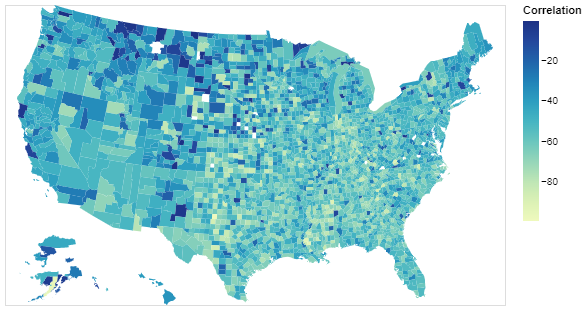

State Data

In [ ]:
alcohol_death_by_state = dict((ranked_data.groupby(by=['State']).mean())['Alcohol-impaired driving deaths']['% Driving Deaths with Alcohol Involvement'])

<ipython-input-33-c300a4f4a9f4>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  alcohol_death_by_state = dict((ranked_data.groupby(by=['State']).mean())['Alcohol-impaired driving deaths']['% Driving Deaths with Alcohol Involvement'])


In [ ]:
driving_alone_by_state = dict((ranked_data.groupby(by=['State']).mean())['Driving alone to work']['% Drive Alone to Work'])

<ipython-input-34-484b3eb6f5af>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  driving_alone_by_state = dict((ranked_data.groupby(by=['State']).mean())['Driving alone to work']['% Drive Alone to Work'])


In [ ]:
full_data = {}

keys = set(list(alcohol_death_by_state.keys()) + list(driving_alone_by_state.keys()))

for key in keys:
  items = []
  items += [alcohol_death_by_state[key]] if key in alcohol_death_by_state else []
  items += [driving_alone_by_state[key]] if key in driving_alone_by_state else []
  full_data[key] = items

In [ ]:
ranked_data

FIPS    State      County Premature death           \
                                      Unreliable   Deaths   
0      1000  Alabama         NaN             NaN  88086.0   
1      1001  Alabama     Autauga             NaN    836.0   
2      1003  Alabama     Baldwin             NaN   3377.0   
3      1005  Alabama     Barbour             NaN    539.0   
4      1007  Alabama        Bibb             NaN    460.0   
...     ...      ...         ...             ...      ...   
3188  56037  Wyoming  Sweetwater             NaN    599.0   
3189  56039  Wyoming       Teton             NaN    111.0   
3190  56041  Wyoming       Uinta             NaN    287.0   
3191  56043  Wyoming    Washakie             NaN    115.0   
3192  56045  Wyoming      Weston             NaN     75.0   

                                                                             \
     Years of Potential Life Lost Rate  95% CI - Low 95% CI - High Quartile   
0                         10350.071456  10246.133257  10454.009654      NaN   
1                          8027.394727   7197.625811   8857.163642      1.0   
2                          8118.358206   7666.874101   8569.842311      1.0   
3                         12876.760319  11149.914146  14603.606492      4.0   
4                         11191.474323   9625.525237  12757.423408      2.0   
...                                ...           ...           ...      ...   
3188                       8419.275418   7452.948800   9385.602036      3.0   
3189                       3283.066198   2299.094504   4267.037892      1.0   
3190                       9358.208153   7755.918433  10960.497873      4.0   
3191                       7073.941804   4932.675230   9215.208378      2.0   
3192                       5149.435226   3393.510261   7492.157898      1.0   

                       ...                 Driving alone to work  \
     YPLL Rate (AIAN)  ... % Drive Alone (Hispanic) 95% CI - Low   
0         5967.152772  ...                             75.535160   
1                 NaN  ...                                   NaN   
2                 NaN  ...                             55.867256   
3                 NaN  ...                                   NaN   
4                 NaN  ...                                   NaN   
...               ...  ...                                   ...   
3188              NaN  ...                             56.557303   
3189              NaN  ...                             52.974559   
3190              NaN  ...                                   NaN   
3191              NaN  ...                                   NaN   
3192              NaN  ...                                   NaN   

                                                                   \
     % Drive Alone (Hispanic) 95% CI - High % Drive Alone (white)   
0                                 78.799663             86.055641   
1                                       NaN             83.296611   
2                                 80.357512             81.540985   
3                                       NaN             86.687233   
4                                       NaN                   NaN   
...                                     ...                   ...   
3188                              72.146677             76.628927   
3189                              72.306914             65.399240   
3190                                    NaN                   NaN   
3191                                    NaN                   NaN   
3192                                    NaN                   NaN   

                                                                             \
     % Drive Alone (white) 95% CI - Low % Drive Alone (white) 95% CI - High   
0                             85.719519                           86.391762   
1                             77.733686                           88.859537   
2                             80.170701                           82.911268   
3      

Creating an easier formatted dataframe to handle the state data.

In [ ]:
full_data

alcho_data = pd.DataFrame(data=full_data)

In [ ]:
alcho_data = alcho_data.T
alcho_data.rename(columns={0: '% of Alcohol Deaths', 1: '% of Driving Alone'}, inplace=True)

In [ ]:
alcho_data.sort_index(inplace=True)

In [ ]:
alcho_data

States  % of Alcohol Deaths  % of Driving Alone  id  \
0                Alabama            28.392261           85.438582   1   
1                 Alaska            49.778212           47.908456   2   
2                Arizona            23.394361           77.266641   4   
3               Arkansas            25.948215           82.270514   5   
4             California            30.311210           73.108669   6   
5               Colorado            29.930741           71.766686   8   
6            Connecticut            30.843176           78.150441   9   
7               Delaware            25.476971           79.748794  10   
8   District of Columbia            29.054054           32.124298  11   
9                Florida            25.202875           78.840344  12   
10               Georgia            22.723506           82.117977  13   
11                Hawaii            34.413722           71.047701  15   
12                 Idaho            29.509794           75.568806  16   
13              Illinois            29.380078           82.131692  17   
14               Indiana            17.101138           81.995635  18   
15                  Iowa            26.679948           79.601063  19   
16                Kansas            19.433891           79.612217  20   
17              Kentucky            25.040662           82.114530  21   
18             Louisiana            30.090289           84.212594  22   
19                 Maine            34.988709           77.386924  23   
20              Maryland            29.959713           76.909131  24   
21         Massachusetts            31.337360           70.947935  25   
22              Michigan            33.534008           80.080855  26   
23             Minnesota            32.015343           78.057141  27   
24           Mississippi            19.215268           84.615720  28   
25              Missouri            25.004996           79.909905  29   
26               Montana            43.064443           69.280186  30   
27              Nebraska            32.737331           76.852820  31   
28                Nevada            23.943555           73.000487  32   
29         New Hampshire            31.049236           78.853571  33   
30            New Jersey            22.726265           73.335211  34   
31            New Mexico            29.453873           77.152275  35   
32              New York            21.827663           73.248341  36   
33        North Carolina            22.816478           81.812041  37   
34          North Dakota            40.767358           75.662691  38   
35                  Ohio            30.512917           83.104875  39   
36              Oklahoma            26.195401           81.224233  40   
37                Oregon            26.668512           73.617762  41   
38          Pennsylvania            26.034690           79.061225  42   
39          Rhode Island            41.141544           80.297127  44   
40        South Carolina            33.763709           83.221936  45   
41          South Dakota            32.621075           74.494998  46   
42             Tennessee            24.854888           83.571135  47   
43                 Texas            22.044655           80.295472  48   
44                  Utah            22.381179           74.581908  49   
45               Vermont            36.487771           75.950915  50   
46              Virginia            30.427774           79.190083  51   
47            Washington            34.989354           73.752171  53   
48         West Virginia            27.754805           82.058643  54   
49             Wisconsin            38.548058           80.297615  55   
50               Wyoming            30.008612           75.814042  56   

    Correlation  
0     57.046321  
1     -1.869756  
2     53.872280  
3     56.322299  
4     42.797459  
5     41.835945  
6     47.307265  
7     54.271822  
8      3.070244  
9     53.637469  
10    59.394470  
11   

In [ ]:
alcho_data.drop(alcho_data.index[8])

In [ ]:
alcho_data.reset_index(inplace=True)

In [ ]:
alcho_data = alcho_data.rename(columns={'index': 'States'})

In [ ]:
# FIPS Matchings found at
# https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm
alcho_data['id'] = [1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                    30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56]

In [ ]:
alcho_data['id'] += 1

In [ ]:
correlation = []
for x, y in zip(list(alcho_data['% of Alcohol Deaths']), list(alcho_data['% of Driving Alone'])):
  n = y - x
  correlation.append(n)

alcho_data['Correlation'] = correlation

Making sure there aren't any spaces that can cause missing data results.

In [ ]:
vega_states = alt.topo_feature(data.us_10m.url, 'states')

alt.Chart(vega_states).mark_geoshape().encode(
    color='% of Alcohol Deaths:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(alcho_data, 'id', ['% of Alcohol Deaths'])
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

alt.Chart(...)

In [ ]:
alcho_data[alcho_data['States'] == 'Texas']['id'] = 48

<ipython-input-89-fe6a71fb625c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alcho_data[alcho_data['States'] == 'Texas']['id'] = 48


In [ ]:
alcho_data

States  % of Alcohol Deaths  % of Driving Alone  id  \
0                Alabama            28.392261           85.438582   1   
1                 Alaska            49.778212           47.908456   2   
2                Arizona            23.394361           77.266641   4   
3               Arkansas            25.948215           82.270514   5   
4             California            30.311210           73.108669   6   
5               Colorado            29.930741           71.766686   8   
6            Connecticut            30.843176           78.150441   9   
7               Delaware            25.476971           79.748794  10   
8   District of Columbia            29.054054           32.124298  11   
9                Florida            25.202875           78.840344  12   
10               Georgia            22.723506           82.117977  13   
11                Hawaii            34.413722           71.047701  15   
12                 Idaho            29.509794           75.568806  16   
13              Illinois            29.380078           82.131692  17   
14               Indiana            17.101138           81.995635  18   
15                  Iowa            26.679948           79.601063  19   
16                Kansas            19.433891           79.612217  20   
17              Kentucky            25.040662           82.114530  21   
18             Louisiana            30.090289           84.212594  22   
19                 Maine            34.988709           77.386924  23   
20              Maryland            29.959713           76.909131  24   
21         Massachusetts            31.337360           70.947935  25   
22              Michigan            33.534008           80.080855  26   
23             Minnesota            32.015343           78.057141  27   
24           Mississippi            19.215268           84.615720  28   
25              Missouri            25.004996           79.909905  29   
26               Montana            43.064443           69.280186  30   
27              Nebraska            32.737331           76.852820  31   
28                Nevada            23.943555           73.000487  32   
29         New Hampshire            31.049236           78.853571  33   
30            New Jersey            22.726265           73.335211  34   
31            New Mexico            29.453873           77.152275  35   
32              New York            21.827663           73.248341  36   
33        North Carolina            22.816478           81.812041  37   
34          North Dakota            40.767358           75.662691  38   
35                  Ohio            30.512917           83.104875  39   
36              Oklahoma            26.195401           81.224233  40   
37                Oregon            26.668512           73.617762  41   
38          Pennsylvania            26.034690           79.061225  42   
39          Rhode Island            41.141544           80.297127  44   
40        South Carolina            33.763709           83.221936  45   
41          South Dakota            32.621075           74.494998  46   
42             Tennessee            24.854888           83.571135  47   
43                 Texas            22.044655           80.295472  48   
44                  Utah            22.381179           74.581908  49   
45               Vermont            36.487771           75.950915  50   
46              Virginia            30.427774           79.190083  51   
47            Washington            34.989354           73.752171  53   
48         West Virginia            27.754805           82.058643  54   
49             Wisconsin            38.548058           80.297615  55   
50               Wyoming            30.008612           75.814042  56   

    Correlation  
0     57.046321  
1     -1.869756  
2     53.872280  
3     56.322299  
4     42.797459  
5     41.835945  
6     47.307265  
7     54.271822  
8      3.070244  
9     53.637469  
10    59.394470  
11   

In [ ]:
class State_Data:
  """Data findings from states"""

  def __init__(self):
    self.y_values = ['% of Alcohol Deaths', '% of Driving Alone', 'Correlation']
    self.colors = ['#03a9fc', '#036bfc', '#001bcc']
    self.c = []

  def show_chart(self, name):
    """Displays a chart"""
    self.c = alt.Chart(alcho_data).mark_area(opacity=0.3).encode(
        y=alt.Y(alt.repeat('layer'), aggregate='mean', title='Physical Factors'),
        x=alt.X('States'),
        color=alt.ColorDatum(alt.repeat('layer'))
    ).repeat(layer=['% of Driving Alone', '% of Alcohol Deaths', 'Correlation'],
    ).configure_range(
        category=alt.RangeScheme(self.colors)
    )

    r = alt.Chart(alcho_data).mark_circle().encode(
        x=f'Correlation:Q',
        y=alt.Y(f'States:N', sort='-color'),
    )
    return self.c

  def show_states(self, name):
    """Show the state view"""
    self.c = alt.Chart(vega_states).mark_geoshape().encode(
        color=f'{name}:Q'
    ).transform_lookup(
        lookup='id',
        from_=alt.LookupData(alcho_data, 'id', [name])
    ).properties(
        width=500,
        height=300
    ).project(
        type='albersUsa'
    )
    return self.c



s = State_Data()
s.show_states(s.y_values[1])

alt.Chart(...)

The chart displays the percentage of alcohol deaths that occur on average occur within each state.

*  Correlation - The closer the value is to zero, the greater the correlation.

Our findings show that while numerous states states happen to drive alone,
Alaska and the District of Columbia tend to drive less alone yet their rate of Alcohol Deaths is similar to that of the driving percentage. (30-40% for each factor)


Stacked Area Chart View

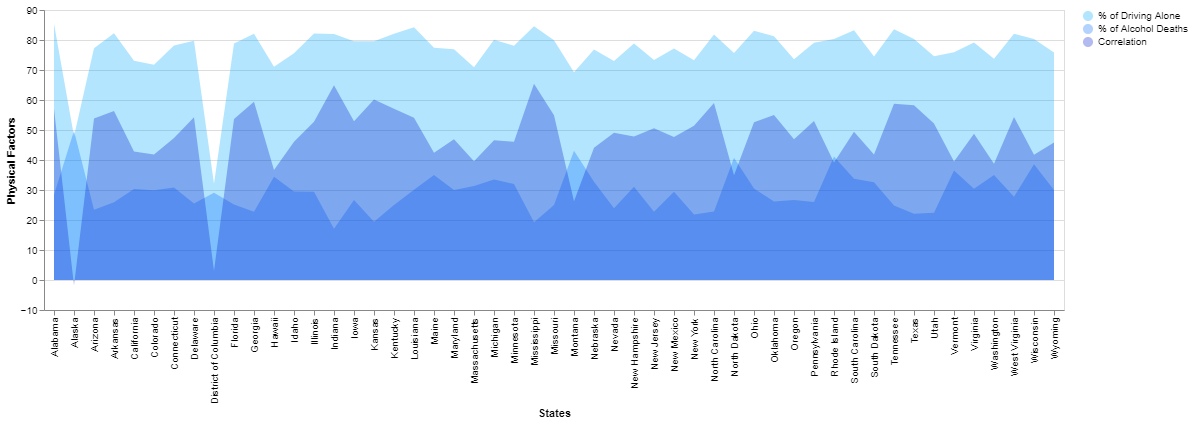

Geo Chart View

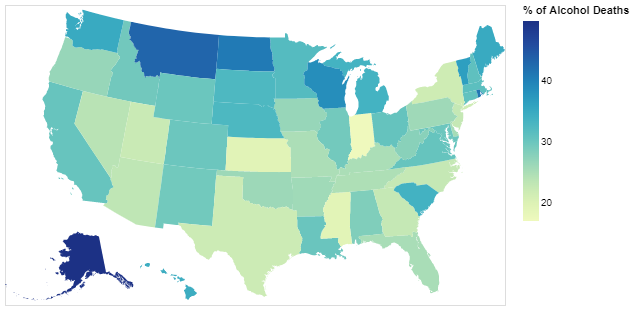

Looking at the geochart view, we tend to find that plenty of states tend to have
alcohol related deaths, the ones that had notably low rates were
- Texas
- Alabama
- Nebraska
- Indiana

with Alaska, North Dakota, Winsconsin, and Montana with the highest alcohol death rates within the country.

Note: Most of the findings of alcohol deaths tend to be more common in the northern states than the southern states.

In [ ]:
s.show_chart(s.y_values[1])

alt.RepeatChart(...)

The chart displays the percentage of people driving alone that occur on average occur within each state.
From what our data visualizations tell us, the country usually tends to have lone drivers within each state with
- Alaska
- District of Columbia
- Hawaii


being less prone to lone driving.


Stacked Area Chart View
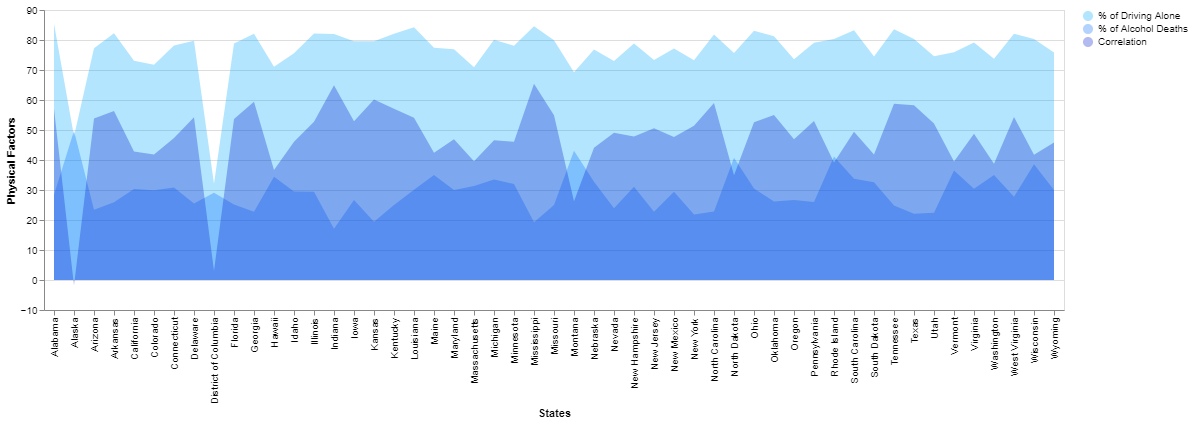

*  Correlation - The closer the value is to zero, the greater the correlation.


Geo Chart View

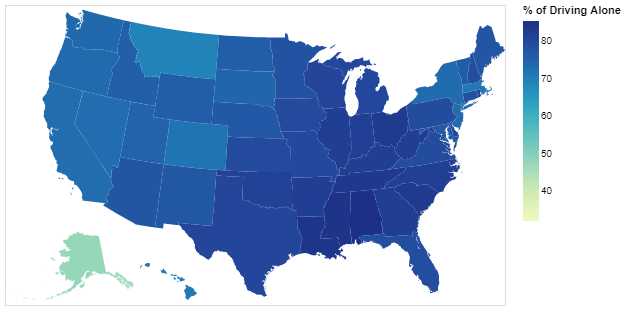

In [ ]:
ranked_data['Mental health providers']['Mental Health Provider Rate']

0       118.21522
1        37.40315
2        99.43869
3        24.40115
4        27.10517
          ...    
3188    246.05723
3189    544.75039
3190    366.06480
3191    399.48454
3192    177.96233
Name: Mental Health Provider Rate, Length: 3193, dtype: float64

In [ ]:
alcho_data['Mental Health Provider Rate'] = ranked_data['Mental health providers']['Mental Health Provider Rate']

In [ ]:
alcho_data

States  % of Alcohol Deaths  % of Driving Alone  id  \
0                Alabama            28.392261           85.438582   1   
1                 Alaska            49.778212           47.908456   2   
2                Arizona            23.394361           77.266641   4   
3               Arkansas            25.948215           82.270514   5   
4             California            30.311210           73.108669   6   
5               Colorado            29.930741           71.766686   8   
6            Connecticut            30.843176           78.150441   9   
7               Delaware            25.476971           79.748794  10   
8   District of Columbia            29.054054           32.124298  11   
9                Florida            25.202875           78.840344  12   
10               Georgia            22.723506           82.117977  13   
11                Hawaii            34.413722           71.047701  15   
12                 Idaho            29.509794           75.568806  16   
13              Illinois            29.380078           82.131692  17   
14               Indiana            17.101138           81.995635  18   
15                  Iowa            26.679948           79.601063  19   
16                Kansas            19.433891           79.612217  20   
17              Kentucky            25.040662           82.114530  21   
18             Louisiana            30.090289           84.212594  22   
19                 Maine            34.988709           77.386924  23   
20              Maryland            29.959713           76.909131  24   
21         Massachusetts            31.337360           70.947935  25   
22              Michigan            33.534008           80.080855  26   
23             Minnesota            32.015343           78.057141  27   
24           Mississippi            19.215268           84.615720  28   
25              Missouri            25.004996           79.909905  29   
26               Montana            43.064443           69.280186  30   
27              Nebraska            32.737331           76.852820  31   
28                Nevada            23.943555           73.000487  32   
29         New Hampshire            31.049236           78.853571  33   
30            New Jersey            22.726265           73.335211  34   
31            New Mexico            29.453873           77.152275  35   
32              New York            21.827663           73.248341  36   
33        North Carolina            22.816478           81.812041  37   
34          North Dakota            40.767358           75.662691  38   
35                  Ohio            30.512917           83.104875  39   
36              Oklahoma            26.195401           81.224233  40   
37                Oregon            26.668512           73.617762  41   
38          Pennsylvania            26.034690           79.061225  42   
39          Rhode Island            41.141544           80.297127  44   
40        South Carolina            33.763709           83.221936  45   
41          South Dakota            32.621075           74.494998  46   
42             Tennessee            24.854888           83.571135  47   
43                 Texas            22.044655           80.295472  48   
44                  Utah            22.381179           74.581908  49   
45               Vermont            36.487771           75.950915  50   
46              Virginia            30.427774           79.190083  51   
47            Washington            34.989354           73.752171  53   
48         West Virginia            27.754805           82.058643  54   
49             Wisconsin            38.548058           80.297615  55   
50               Wyoming            30.008612           75.814042  56   

    Correlation  Mental Health Provider Rate  
0     57.046321                    118.21522  
1     -1.869756                     37.40315  
2     53.872280                     99.43869  
3     56.322299                  

In [ ]:

n_findings = Chart(alcho_data).mark_circle(opacity=0.8).encode(
    x=alt.X('Mental Health Provider Rate'),
    y=alt.Y(alt.repeat('layer'), aggregate='mean', title='County Factors', type='quantitative'),
    color=alt.ColorDatum(alt.repeat('layer')),
    #size='Mental Health Provider Rate'
).repeat(layer=['% of Alcohol Deaths', '% of Driving Alone'],
).configure_range(
    category=alt.RangeScheme(['#03a9fc', '#036bfc', '#00F6FE'])
)

n_findings

While looking at the rate of health providers within each
state, we can see that most states that have a higher percentage
of
- Alochol Deaths
- Lone Drivers

tend to have a lack of mental health providers with a rate
consisting promininetly of 0-100.

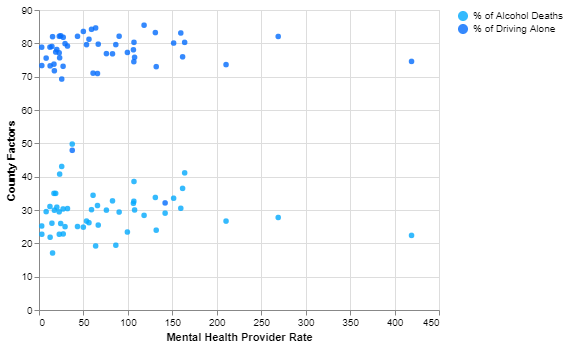

# Do high physical inactivity rates found within the rankings tend to correlate with high adult obesity rates?

In [ ]:
inactive_data = ranked_data['Physical inactivity']['% Physically Inactive']
inactive_data = list(inactive_data)

In [ ]:
ranked_data['Physical inactivity']

% Physically Inactive  95% CI - Low  95% CI - High  Quartile
0                      30.8          29.3           32.4       NaN
1                      32.2          29.5           34.9       1.0
2                      27.6          24.7           30.4       1.0
3                      41.6          38.7           44.3       4.0
4                      37.7          35.1           40.2       3.0
...                     ...           ...            ...       ...
3188                   25.2          23.2           27.5       2.0
3189                   18.5          16.5           20.8       1.0
3190                   27.8          25.2           30.4       4.0
3191                   25.9          23.5           28.3       2.0
3192                   26.5          23.8           29.2       2.0

[3193 rows x 4 columns]

In [ ]:
obesity_data = ranked_data['Adult obesity']['% Adults with Obesity']
obesity_data = list(obesity_data)

In [ ]:
obes_data = ranked_data['Adult obesity']['% Adults with Obesity']
early_death = ranked_data['Premature death']['Years of Potential Life Lost Rate']

In [ ]:
obes_data

0       36.3
1       35.3
2       29.6
3       40.4
4       41.2
        ... 
3188    33.5
3189    22.2
3190    29.8
3191    28.9
3192    33.4
Name: % Adults with Obesity, Length: 3193, dtype: float64

In [ ]:
second_correlation = pd.DataFrame({'Years of Potential Life Lost Rate' : early_death, 'Obesity rates' : obes_data, 'Poor Mental Health Days': bad_mental_health})

In [ ]:
second_correlation['Physical Inactivity Rates'] = inactive_data

In [ ]:
correlation = pd.DataFrame({'Inactive rates': inactive_data, 'Obesity rates': obesity_data,'Poor Mental Health Days': bad_mental_health})

In [ ]:
Chart(correlation).mark_circle().encode(
    x='Inactive rates',
    y='Obesity rates',
    color='Obesity rates'
)

alt.Chart(...)

The scatter plot shows that countries tend
to have obesity rates between 25% to 45% which
correlates with the inactivity rates containing 
approximately the same percentage. (20% - 45%)

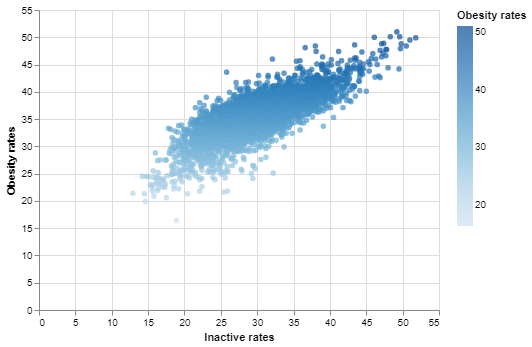

In [ ]:
correlation['Inactive rates'].corr(correlation['Obesity rates'])

0.793112176532064

The correlation between both rates also shows that there is 
a correlation of nearly 80% between the two data sets.

In [ ]:
class Physical_Factors:
  """Shows findings for Q5"""
  def __init__(self):
    self.c = []
    self.colors = ['#03a9fc', '#036bfc', '#00F6FE']

  def show_corr(self):
      """Shows the Inactive/Obesity Correlation"""
      self.c = Chart(correlation).mark_circle().encode(
          x='Inactive rates',
          y='Obesity rates',
          color='Obesity rates'
      )
      return self.c

  def show_yypl(self):
      """Shows the YYPL Findings"""
      self.c = Chart(second_correlation).mark_circle(opacity=0.2).encode(
          x=alt.X('Years of Potential Life Lost Rate'),
          y=alt.Y(alt.repeat('layer'), aggregate='mean', title='Physical Factors'),
          color=alt.ColorDatum(alt.repeat('layer'))
      ).repeat(layer=['Physical Inactivity Rates', 'Obesity rates', 'Poor Mental Health Days'],
      ).configure_range(
          category=alt.RangeScheme(self.colors)
      )
      return self.c

g = Physical_Factors()
g.show_yypl()

alt.RepeatChart(...)

We also find that Obesity and Physical Activity Rates tend to lead to
a YPLL rate of 5,000 to 20,000. 

What does this data mean? 

Our findings show us that both Obesity and Physical Activity
Rates tend to have a similar effect of shortening the length
of American lives.
Another noticeable factor is that individuals that tend to have more poor mental health days within the week tend to also be more
- Physically inactive
- Obese
- Potential years of life lost

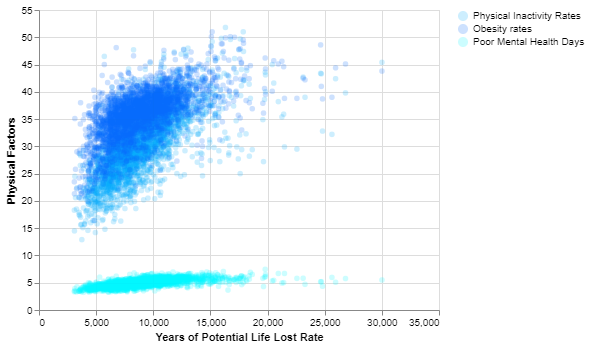

In [ ]:
sns.set_theme()
sns.lmplot(y="Poor Mental Health Days", x="Obesity rates", hue="Poor Mental Health Days", data=second_correlation, scatter_kws={'alpha': 0.15})

As we look more at the correlation between the obesity rates, we tend to find that counties with (30-40%) of obesity rates tend to have in between (4 - 6) days of poor mental health days.


*   Pink - 6-7 poor mental health days within the week
*   Red - <= 3 poor mental health days within the week



Even within the outskirts of our data, 
counties that have obesity rates above 40% within their population tend to have poor mental health days throughout the week. 


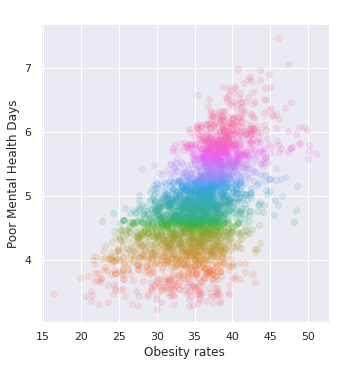

Here is the correlation which shows that
individuals with higher obesity rates tend to have more poor mental health days.

In [ ]:
correlation['Poor Mental Health Days'].corr(correlation['Obesity rates'])

0.5446131445201996

In [ ]:
sns.set_theme()
sns.lmplot(y="Poor Mental Health Days", x="Physical Inactivity Rates", hue="Poor Mental Health Days", data=second_correlation, scatter_kws={'alpha': 0.15})

We can compare the amount of poor mental health days for the population within the week with the amount of physical inactivity rates and also see that the coorelation tends to be similar to the obesity rates.
(We can find most of the population has 20-40% of obesity rates and 4-6 days within the week of poor mental health.)

Conclusion:
We can infer from the county findings that high obesity rates
can result from or to
- More Poor Mental Health Days
- Higher Inactivity Rates

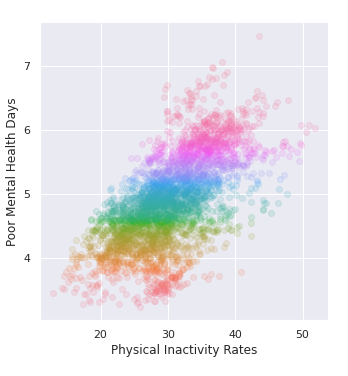

In [ ]:
import pandas as pd
import altair as alt
from altair import Chart, X, Y, Color, Scale


names = ['Outcomes & Factors Rankings', 'Outcomes & Factors SubRankings', 'Additional Measure Data', 'Ranked Measure Data']

def filter_dataset(name):
  """Cleans up our dataset"""
  rank_data = pd.read_excel('/content/2022 County Health Rankings Data - v1 (1).xlsx', sheet_name=name, header=[0, 1])

  return rank_data

all_data_sets = []

for i in range(4):
  all_data_sets.append(filter_dataset(names[i]))

ranks = all_data_sets[0]
sub_ranks = all_data_sets[1]
additional_data = all_data_sets[2]
ranked_data = all_data_sets[3]

In [ ]:
excessive_drinking_data = ranked_data['Excessive drinking']['% Excessive Drinking']
excessive_drinking_data = list(excessive_drinking_data)

In [ ]:
poor_mental_health = ranked_data['Poor mental health days']['Average Number of Mentally Unhealthy Days']
poor_mental_health = list(poor_mental_health)

In [ ]:
correlation = pd.DataFrame({'Excessive Drinking': excessive_drinking_data, 'Poor Mental Health': poor_mental_health})

In [ ]:
Chart(correlation).mark_circle().encode( x='Excessive Drinking', y='Poor Mental Health', color='Poor Mental Health').interactive()

alt.Chart(...)

In [ ]:
# Which 5 States have the counties with lowest mental health days?
# South Dakota
# North Dakota
# Virginia
# Wyoming
# Hawaii

#--------------------------------------------------------------------

# The graph above shows that as poor mental health lowers, the amount
# of excessive Drinking increases.

# Escaping poor mental health by drowning oneself in alcohol?


correlation['Excessive Drinking'].corr(correlation['Poor Mental Health'])

-0.5757713575105606

In [ ]:
import pandas as pd
import altair as alt
from altair import Chart, X, Y, Color, Scale

In [ ]:
import pandas as pd
import altair as alt
from altair import Chart, X, Y, Color, Scale
from vega_datasets import data
import numpy as np

In [ ]:
def remove_unnamed(df):
  """Solution found on https://stackoverflow.com/questions/40839609/rename-unnamed-multiindex-columns-in-pandas-dataframe"""
  for i, columns in enumerate(df.columns.levels):
    new_columns = columns.tolist()
    for j, row in enumerate(new_columns):
      if "Unnamed: " in row:
        new_columns[j] = ""
    if pd.__version__ < "0.21.0":
      df.columns.set_levels(new_columns, level=i, inplace=True)
    else:
      df = df.rename(columns=dict(zip(columns.tolist(), new_columns)),
                     level=i)
  return df

In [ ]:
import pandas as pd

names = ['Outcomes & Factors Rankings', 'Outcomes & Factors SubRankings', 'Additional Measure Data', 'Ranked Measure Data']

def filter_dataset(name):
  """Cleans up our dataset"""
  rank_data = pd.read_excel('/content/2022 County Health Rankings Data - v1 (1).xlsx', sheet_name=name, header=[0, 1])

  return rank_data

all_data_sets = []

for i in range(4):
  all_data_sets.append(remove_unnamed(filter_dataset(names[i])))

ranks = all_data_sets[0]
sub_ranks = all_data_sets[1]
additional_data = all_data_sets[2]
ranked_data = all_data_sets[3]


 # What are the top 20 counties with the lowest high school completion rates grouped by each state and does this correlate to the number of teen births?

In [ ]:
import pandas as pd
import altair as alt
from altair import Chart, X, Y, Color, Scale
from google.colab import drive
drive.mount('/content/drive')

names = ['Outcomes & Factors Rankings', 'Outcomes & Factors SubRankings', 'Additional Measure Data', 'Ranked Measure Data']

def filter_dataset(name):
  """Cleans up our dataset"""
  rank_data = pd.read_excel('/content/drive/MyDrive/Data Science/2022 County Health Rankings Data - v1.xlsx', sheet_name=name, header=[0, 1])

  return rank_data

all_data_sets = []

for i in range(4):
  all_data_sets.append(filter_dataset(names[i]))

ranks = all_data_sets[0]
sub_ranks = all_data_sets[1]
additional_data = all_data_sets[2]
ranked_data = all_data_sets[3]

Mounted at /content/drive


In [ ]:
teen_birth_data = ranked_data['Teen births']['Teen Birth Rate']
teen_birth_data = list(teen_birth_data)

In [ ]:
school_completed = ranked_data['High school completion']['% Completed High School']
school_completed = list(school_completed)

In [ ]:
correlation = pd.DataFrame({'Birth rates': teen_birth_data, 'Completion rates': school_completed})

In [ ]:
Chart(correlation).mark_circle().encode( x='Birth rates', y='Completion rates', color='Completion rates').interactive()

alt.Chart(...)

In [ ]:
# Top 20 counties with the lowest high school completion rates, grouped by state:
# Texas: Kenedy, Presidio, Hudspeth, Starr, Maverick, Gaines, Culberson, Frio, Garza, La Salle, Moore, Zapata, Brooks, Hidalgo
# Ohio: Holmes
# Indiana: LaGrange
# Idaho: Clark
# Mississippi: Issaquena
# Kentucky: Clay
# Georgia: Atkinson

# Texas holds almost 3/4's of the lowest 20 Highschool completion States, at 14 out of 20
# Possible reasoning could be its location next to the border?

#------------------------------------------------------------------------------------------

# The graph above shows that as the High School Completion rate drops, the Teen Birth rate
# steadaly rises. There is a correlation of almost 70%.

correlation['Birth rates'].corr(correlation['Completion rates'])

-0.6928404862109756

# Are there demographic and social factors that are predictors of drug
# overdose, alcohol-related driving incidents?

In [ ]:
import pandas as pd
import altair as alt
from altair import Chart, X, Y, Color, Scale
from vega_datasets import data
import numpy as np

In [ ]:
def remove_unnamed(df):
  """Solution found on https://stackoverflow.com/questions/40839609/rename-unnamed-multiindex-columns-in-pandas-dataframe"""
  for i, columns in enumerate(df.columns.levels):
    new_columns = columns.tolist()
    for j, row in enumerate(new_columns):
      if "Unnamed: " in row:
        new_columns[j] = ""
    if pd.__version__ < "0.21.0":
      df.columns.set_levels(new_columns, level=i, inplace=True)
    else:
      df = df.rename(columns=dict(zip(columns.tolist(), new_columns)),
                     level=i)
  return df

In [ ]:
import pandas as pd

names = ['Outcomes & Factors Rankings', 'Outcomes & Factors SubRankings', 'Additional Measure Data', 'Ranked Measure Data']

def filter_dataset(name):
  """Cleans up our dataset"""
  rank_data = pd.read_excel('/content/2022 County Health Rankings Data - v1 (1).xlsx', sheet_name=name, header=[0, 1])

  return rank_data

all_data_sets = []

for i in range(4):
  all_data_sets.append(remove_unnamed(filter_dataset(names[i])))

ranks = all_data_sets[0]
sub_ranks = all_data_sets[1]
additional_data = all_data_sets[2]
ranked_data = all_data_sets[3]

### Alcohol Related Driving Incidents

In [ ]:
ranked_data['Alcohol-impaired driving deaths']['% Driving Deaths with Alcohol Involvement']

0       25.886964
1       32.142857
2       32.203390
3       37.500000
4       21.428571
          ...    
3188    18.333333
3189    18.181818
3190    17.391304
3191     0.000000
3192    22.222222
Name: % Driving Deaths with Alcohol Involvement, Length: 3193, dtype: float64

In [ ]:
ranked_data['Adult smoking']['% Smokers']

0       21.092716
1       19.700000
2       19.900000
3       27.800000
4       25.200000
          ...    
3188    17.000000
3189    11.300000
3190    18.800000
3191    17.600000
3192    19.200000
Name: % Smokers, Length: 3193, dtype: float64

In [ ]:
additional_data['Drug overdose deaths']['Drug Overdose Mortality Rate']

0       17.481629
1        8.352474
2       17.597678
3             NaN
4       23.905573
          ...    
3188    21.863556
3189          NaN
3190          NaN
3191          NaN
3192          NaN
Name: Drug Overdose Mortality Rate, Length: 3193, dtype: float64

Social Factors
- Social Associations
- Access to excersize opportunities

In [ ]:
ranked_data['Social associations']['Social Association Rate']

0       12.155364
1       12.887290
2       10.123906
3        7.291582
4        8.930964
          ...    
3188     8.974329
3189    18.325946
3190     3.460892
3191    16.655990
3192    11.549011
Name: Social Association Rate, Length: 3193, dtype: float64

In [ ]:
sub_ranks['Health Behaviors']['Rank']

0       NaN
1         9
2         6
3        65
4        55
       ... 
3188     10
3189      1
3190     13
3191      5
3192     19
Name: Rank, Length: 3193, dtype: object

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Normalizing our data in order to get a MSE closer to 0.

In [ ]:
social_df = pd.DataFrame({
    'Social Ranking': sub_ranks['Social & Economic Factors']['Rank'],
    'Alcohol Deaths': ranked_data['Alcohol-impaired driving deaths']['% Driving Deaths with Alcohol Involvement'],
    'Health Behaviors' : sub_ranks['Health Behaviors']['Rank'],
})

social_df.dropna(inplace=True)
social_df.loc[social_df['Social Ranking'] == 'NR'] = 0

mm_scaler = preprocessing.MinMaxScaler()
df_scaled = mm_scaler.fit_transform(social_df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
    'Social Ranking', 'Alcohol Deaths', 'Health Behaviors'
])

social_df = df_scaled

#social_df['Alcohol Deaths'] = preprocessing.normalize((social_df['Alcohol Deaths']).reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(social_df[['Social Ranking', 'Health Behaviors']], social_df['Alcohol Deaths'], test_size=0.20, random_state=997)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Training our model (Factoring the % of Alcohol Deaths)

In [ ]:
model.predict(X_test)

array([0.2717068 , 0.28932612, 0.24674734, 0.2746243 , 0.28551514,
       0.25926603, 0.25932902, 0.28244763, 0.2830502 , 0.27570675,
       0.27406069, 0.28029765, 0.26404259, 0.27315809, 0.28345799,
       0.31472651, 0.27570675, 0.287995  , 0.30722724, 0.27671129,
       0.27567691, 0.27005163, 0.29185986, 0.28280735, 0.26812376,
       0.27693922, 0.24561101, 0.26256146, 0.27799764, 0.26178485,
       0.29106832, 0.2363455 , 0.29067546, 0.27366782, 0.27247761,
       0.26289134, 0.22923909, 0.26372183, 0.27083735, 0.2731672 ,
       0.26991072, 0.27556585, 0.25791669, 0.29714615, 0.27126006,
       0.24962588, 0.26650753, 0.33768019, 0.25934394, 0.28338919,
       0.27529896, 0.25127194, 0.29909225, 0.29189881, 0.25591672,
       0.33707181, 0.27529896, 0.23902014, 0.273512  , 0.28876832,
       0.27215355, 0.30078638, 0.27452235, 0.26485816, 0.24326294,
       0.24684018, 0.26660037, 0.24048635, 0.28302617, 0.2890352 ,
       0.27995866, 0.27576974, 0.2991942 , 0.26099331, 0.25971

Mean Squared Error (% of Alcohol Deaths)

In [ ]:
mean_squared_error(y_test, model.predict(X_test))

0.023550677902751758

In [ ]:
social_df['predictions'] = model.predict(social_df[['Social Ranking', 'Health Behaviors']])

Chart(social_df).mark_circle().encode(
    x='Social Ranking',
    y='Health Behaviors'
) + \
Chart(social_df).mark_circle(color='red', opacity=0.4).encode(
    x='Social Ranking',
    y='predictions'
) 

orig = Chart(social_df).mark_circle().encode(
    x='Social Ranking',
    y='Health Behaviors'
)

alch = Chart(social_df).mark_circle(color='red', opacity=0.4).encode(
    x='Social Ranking',
    y='predictions'
) 

### Drug-Overdose

Normalizing our data in order to get a MSE closer to 0

In [ ]:
social_df = pd.DataFrame({
    'Social Ranking': sub_ranks['Social & Economic Factors']['Rank'],
    'Drug Overdose' : additional_data['Drug overdose deaths']['Drug Overdose Mortality Rate'],
    'Health Behaviors' : sub_ranks['Health Behaviors']['Rank']
})

social_df.dropna(inplace=True)
social_df.loc[social_df['Social Ranking'] == 'NR'] = 0

mm_scaler = preprocessing.MinMaxScaler()
df_scaled = mm_scaler.fit_transform(social_df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
    'Social Ranking', 'Drug Overdose', 'Health Behaviors'
])

social_df = df_scaled


X_train, X_test, y_train, y_test = train_test_split(social_df[['Social Ranking', 'Health Behaviors']], social_df['Drug Overdose'], test_size=0.20, random_state=997)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Training our model (Factoring the % of Drug Overdoses)

In [ ]:
model.predict(X_test)

array([0.16593633, 0.16373546, 0.17405688, 0.16936191, 0.17312429,
       0.16704917, 0.16648962, 0.17173272, 0.16878271, 0.16293241,
       0.16317283, 0.1670046 , 0.17398848, 0.16627928, 0.16909668,
       0.16812161, 0.16379452, 0.17366309, 0.1654006 , 0.17311913,
       0.16885626, 0.17508474, 0.16494468, 0.18249864, 0.17167157,
       0.17161975, 0.16985515, 0.17814772, 0.16598397, 0.17495004,
       0.16506489, 0.16817552, 0.17039395, 0.17813839, 0.16306711,
       0.16464004, 0.17171406, 0.17266629, 0.16388157, 0.1704147 ,
       0.17175863, 0.16294899, 0.16358627, 0.16348263, 0.17146123,
       0.18207796, 0.1681237 , 0.16338833, 0.17506817, 0.16315417,
       0.16306711, 0.17003233, 0.17114726, 0.16771027, 0.16792994,
       0.17389627, 0.16455507, 0.18349753, 0.16237704, 0.16506281,
       0.17985535, 0.16496851, 0.16299148, 0.16574773, 0.18332133,
       0.16821591, 0.18194228, 0.16784497, 0.17615203, 0.17387036,
       0.16593216, 0.17123014, 0.16321115, 0.17638828, 0.16718

Mean Squared Error (% of Drug Overdoses)

In [ ]:
mean_squared_error(y_test, model.predict(X_test))

0.011304416144501998

In [ ]:
social_df['predictions'] = model.predict(social_df[['Social Ranking', 'Health Behaviors']])


drug = Chart(social_df).mark_circle(color='purple', opacity=0.4).encode(
    x='Social Ranking',
    y='predictions'
)

orig + alch + drug

alt.LayerChart(...)

Using linear regression, we are able predict
that
- With the percentage of alcohol deaths being factored within each county,
  we can predict that a higher percentage of alcohol deaths will gradually
  decrease the social ranking of a county as well as their general
  health behavior.
- With the percentage of drug-overdoses considered there suprisingly turns
  out to be a remedial increase of both the social ranking and the health   behavior within each county.

- Blue Line - Social Ranking and Health Behaviors comparison
- Purple Line - Social Ranking and Health Behaviors (% of Drug-Overdoses considered)
- Red Line - Social Ranking and Health Behaviors comparison (% of Alcohol Deaths considered)

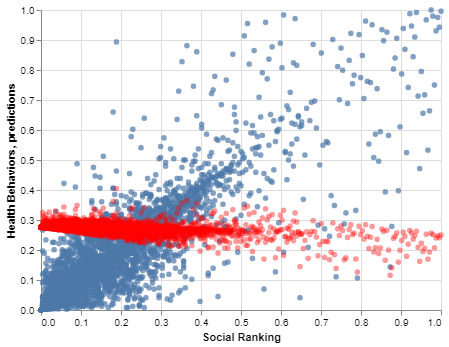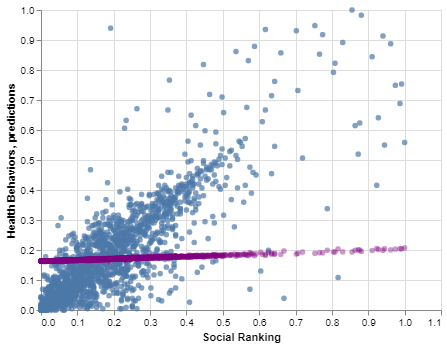


# 7. Are there demographic and social determinants, access to care
# factors that are predictors of physical and emotional health

In [ ]:
import pandas as pd
import altair as alt
from altair import Chart, X, Y, Color, Scale
from vega_datasets import data
import numpy as np

Predictive Modeling Cleanup -

The County Findings Dataset was high in storage, so it was necessary to utilize different forms of application software in order to manipulate and visualize the data in order to minimize the time needed to work on the questions for this dataset (e.g. Pandas, Matplotlib, Altair). Moreover, the team eventually moved to the data cleanup process as many of the columns received from the dataset were "unnamed". The algorithm utilized
sequentially iterates through each column and if the column shows as "unnamed", it will be
changed to a blank column.

In [ ]:
def remove_unnamed(df):
  """Solution found on https://stackoverflow.com/questions/40839609/rename-unnamed-multiindex-columns-in-pandas-dataframe"""
  for i, columns in enumerate(df.columns.levels):
    new_columns = columns.tolist()
    for j, row in enumerate(new_columns):
      if "Unnamed: " in row:
        new_columns[j] = ""
    if pd.__version__ < "0.21.0":
      df.columns.set_levels(new_columns, level=i, inplace=True)
    else:
      df = df.rename(columns=dict(zip(columns.tolist(), new_columns)),
                     level=i)
  return df

In [ ]:
import pandas as pd

names = ['Outcomes & Factors Rankings', 'Outcomes & Factors SubRankings', 'Additional Measure Data', 'Ranked Measure Data']

def filter_dataset(name):
  """Cleans up our dataset"""
  rank_data = pd.read_excel('/content/2022 County Health Rankings Data - v1 (1).xlsx', sheet_name=name, header=[0, 1])

  return rank_data

all_data_sets = []

for i in range(4):
  all_data_sets.append(remove_unnamed(filter_dataset(names[i])))

ranks = all_data_sets[0]
sub_ranks = all_data_sets[1]
additional_data = all_data_sets[2]
ranked_data = all_data_sets[3]

Social, demographic, and Access to Care Factors

In [ ]:
soc_eco_factors = sub_ranks['Social & Economic Factors']

In [ ]:
clin_care = sub_ranks['Clinical Care']

Lists the rate of preventable hospital visits by ethnicity.

In [ ]:
ethnicities = ['AIAN', 'Asian', 'Black', 'Hispanic', 'white']

phs = []
for eth in ethnicities:
  phs.insert(-1, ranked_data['Preventable hospital stays']['Preventable Hosp. Rate (' + eth + ')'])

Lists the rate of teeth birth rates by ethnicity

In [ ]:
t_births = []
for eth in ethnicities:
  t_births.insert(-1, ranked_data['Teen births']['Teen Birth Rate (' + eth + ')'])

Lists the rate of children in poverty by ethnicity

In [ ]:
for eth in ethnicities:
  print(ranked_data['Children in poverty']['% Children in Poverty (' + eth + ')'])

0       26.231017
1             NaN
2       31.250000
3             NaN
4             NaN
          ...    
3188          NaN
3189          NaN
3190          NaN
3191          NaN
3192          NaN
Name: % Children in Poverty (AIAN), Length: 3193, dtype: float64
0       11.75907
1       16.82243
2            NaN
3            NaN
4            NaN
          ...   
3188         NaN
3189         NaN
3190         NaN
3191         NaN
3192         NaN
Name: % Children in Poverty (Asian), Length: 3193, dtype: float64
0       38.401979
1       50.017525
2       16.306483
3       59.438776
4       41.633858
          ...    
3188    42.857143
3189          NaN
3190          NaN
3191          NaN
3192          NaN
Name: % Children in Poverty (Black), Length: 3193, dtype: float64
0       38.042586
1       14.124294
2       24.321908
3       88.120950
4        7.926829
          ...    
3188    26.683189
3189          NaN
3190    31.203008
3191    12.953368
3192          NaN
Name: % Children in Po

In [ ]:
cip = ranked_data['Children in poverty']['% Children in Poverty']

Average number of poor physical and mental health days.

In [ ]:
phd = ranked_data['Poor physical health days']['Average Number of Physically Unhealthy Days']

In [ ]:
pmd = ranked_data['Poor mental health days']['Average Number of Mentally Unhealthy Days']

In [ ]:
health_df = pd.DataFrame({
  'Average # of Poor Physical Health Days' : phd,
  'Average # of Poor Mental Health Days' : pmd ,
  '% Children in Poverty': cip
})

In [ ]:
health_df

Average # of Poor Physical Health Days  \
0                                   4.814633   
1                                   4.510042   
2                                   4.168866   
3                                   5.884415   
4                                   5.161337   
...                                      ...   
3188                                3.495993   
3189                                2.779692   
3190                                3.792121   
3191                                3.660729   
3192                                3.703659   

      Average # of Poor Mental Health Days  % Children in Poverty  
0                                 5.618316                   20.9  
1                                 5.419068                   14.9  
2                                 5.173915                   12.4  
3                                 6.109899                   37.5  
4                                 5.846096                   21.9  
...                                    ...                    ...  
3188                              3.933550                    8.4  
3189                              3.305173                    4.3  
3190                              4.268578                    9.7  
3191                              4.040619                   10.7  
3192                              4.180846                   12.6  

[3193 rows x 3 columns]

In [ ]:
hospital_prevention = {
    'Asian': phs[0],
    'Black': phs[1],
    'Hispanic': phs[2],
    'white': phs[3],
    'AIAN': phs[4]
}

teen_births = {
    'Asian': t_births[0],
    'Black': t_births[1],
    'Hispanic': t_births[2],
    'white': t_births[3],
    'AIAN': t_births[4]    
}



for eth in ethnicities:
  #health_df[eth] = hospital_prevention[eth]
  health_df[eth] = teen_births[eth]

In [ ]:
teen_births

{'Asian': 0       4.260532
 1            NaN
 2            NaN
 3            NaN
 4            NaN
           ...   
 3188         NaN
 3189         NaN
 3190         NaN
 3191         NaN
 3192         NaN
 Name: Teen Birth Rate (Asian), Length: 3193, dtype: float64,
 'Black': 0       33.924512
 1       29.495380
 2       30.647383
 3       34.456645
 4       23.841060
           ...    
 3188          NaN
 3189          NaN
 3190          NaN
 3191          NaN
 3192          NaN
 Name: Teen Birth Rate (Black), Length: 3193, dtype: float64,
 'Hispanic': 0       52.301114
 1             NaN
 2       41.714948
 3       76.923077
 4             NaN
           ...    
 3188    32.585470
 3189          NaN
 3190    30.630631
 3191    29.891304
 3192          NaN
 Name: Teen Birth Rate (Hispanic), Length: 3193, dtype: float64,
 'white': 0       22.879460
 1       21.931674
 2       22.096218
 3       30.335285
 4       35.962145
           ...    
 3188    24.872449
 3189          NaN
 319

In [ ]:
health_df.columns

Index(['Average # of Poor Physical Health Days',
       'Average # of Poor Mental Health Days', '% Children in Poverty', 'AIAN',
       'Asian', 'Black', 'Hispanic', 'white'],
      dtype='object')

In [ ]:
health_df.columns


Index(['Average # of Poor Physical Health Days',
       'Average # of Poor Mental Health Days', '% Children in Poverty', 'AIAN',
       'Asian', 'Black', 'Hispanic', 'white'],
      dtype='object')

In [ ]:
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, LogisticRegression

cp = health_df.dropna()

X_train, X_test, y_train, y_test = train_test_split(cp[['AIAN']], cp['Average # of Poor Physical Health Days'], test_size=0.20, random_state=997)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_test)

array([4.00305606, 3.99282332, 3.95216456, 3.94531899, 3.97586692,
       4.01431054, 3.9943523 , 3.95747544, 3.91723967, 3.98289498,
       3.93526486, 3.8737369 , 3.89838612, 3.99967791, 3.93023558,
       3.76369401, 3.97814545, 4.01896041, 3.98635024, 3.94432278,
       3.90656857, 3.97899235, 3.91157588, 3.97918965, 3.91264202,
       3.98776872, 3.90686293, 3.93988328, 4.01775791])

In [ ]:



def plot_train_model(ethnicities, idp_var):
  """""""""""""""
  ethnicities - which ethnicties are factored in
  idp_var - where is our independent variable
  """""""""""""""
  from pandas.core.common import random_state
  from sklearn.linear_model import LinearRegression, LogisticRegression
  from sklearn.metrics import mean_squared_error, r2_score
  from sklearn.model_selection import train_test_split
  from sklearn import preprocessing
  from sklearn.linear_model import LinearRegression, LogisticRegression

  cp = health_df.dropna()

  X_train, X_test, y_train, y_test = train_test_split(cp[[ethnicities]], cp[idp_var], test_size=0.20, random_state=997)
  model = LinearRegression()
  model.fit(X_train, y_train)
  model.predict(X_test)


  print()
  print(eth + ': ')
  print('R2 Score: ' + str(mean_squared_error(y_test, model.predict(X_test))))
  print('Mean Squared Error: ' + str(r2_score(y_test, model.predict(X_test))))
  print()

  y = model.predict(X_test)
  x = y_test
  plt.scatter(x, y, alpha=0.5)


  if ethnicities == 'Hispanic':
    (m, b) = np.polyfit(y_test, y, 1)
    yp = np.polyval([m, b], x)
    plt.plot(x, yp)

In [ ]:
ethnicities.insert(-1, 'Predictions')


AIAN: 
R2 Score: 0.2705412056967329
Mean Squared Error: -0.133554445471193


Asian: 
R2 Score: 0.25190290095938483
Mean Squared Error: -0.05546085844566995


Black: 
R2 Score: 0.20318076632332094
Mean Squared Error: 0.1486825073211927


Hispanic: 
R2 Score: 0.2462485436291499
Mean Squared Error: -0.031769377247958364



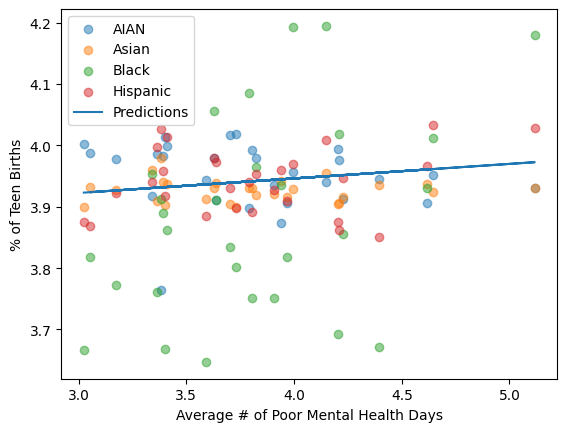

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

"""
for eth in ethnicities:
  y = np.array(hospital_prevention[eth])
  x = np.array(health_df['Average # of Poor Physical Health Days'])
  ax.scatter(x, y)
"""

for eth in ethnicities[0:-2]:
  plot_train_model(eth, 'Average # of Poor Physical Health Days')

plt.legend(ethnicities)


ax.set_xlabel('Average # of Poor Mental Health Days')
ax.set_ylabel('% of Teen Births')

plt.show()


AIAN: 
R2 Score: 29.811832312501757
Mean Squared Error: -0.13331146914344338


Asian: 
R2 Score: 28.399316526412086
Mean Squared Error: -0.0796139867498411


Black: 
R2 Score: 22.016977132912768
Mean Squared Error: 0.16301378462620797


Hispanic: 
R2 Score: 25.592778314358796
Mean Squared Error: 0.027077943855695508



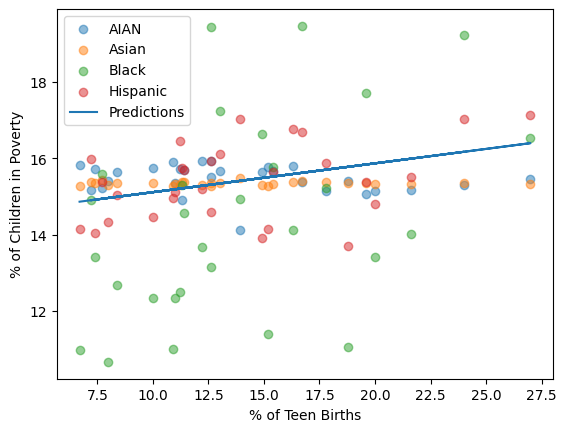

In [ ]:
fig, ax = plt.subplots()

for eth in ethnicities[0:-2]:
  plot_train_model(eth, '% Children in Poverty')

plt.legend(ethnicities)


ax.set_xlabel('% of Teen Births')
ax.set_ylabel('% of Children in Poverty')

plt.show()


Predictive Analysis - 

The % of teen births with all races shows a higher relationship of an increase of poor mental health days among Indian, Asian, and Black Americans, while ethnicities such as White and Hispanic Americans tend to have a lower amount of poor mental health days that happened to have children as teenagers.

The % of children that people that have children as teenagers and have children in poverty are usually are American Indians and Asian Americans while White and Black Americans tend to have a lower amount of children in poverty.

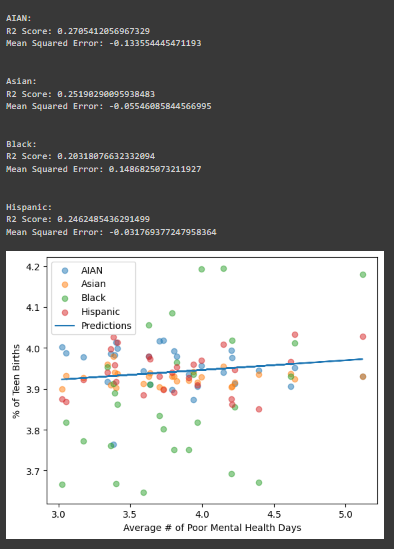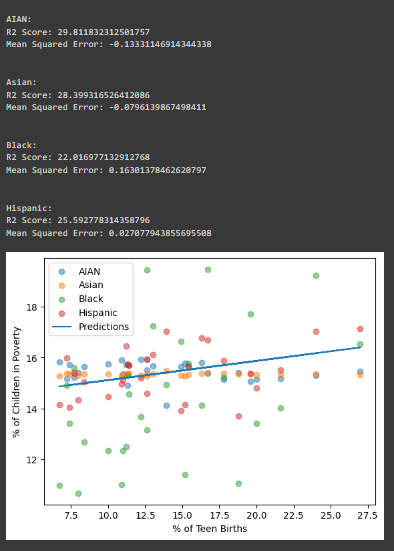

In [ ]:
model.predict(X_test)

array([4.00305606, 3.99282332, 3.95216456, 3.94531899, 3.97586692,
       4.01431054, 3.9943523 , 3.95747544, 3.91723967, 3.98289498,
       3.93526486, 3.8737369 , 3.89838612, 3.99967791, 3.93023558,
       3.76369401, 3.97814545, 4.01896041, 3.98635024, 3.94432278,
       3.90656857, 3.97899235, 3.91157588, 3.97918965, 3.91264202,
       3.98776872, 3.90686293, 3.93988328, 4.01775791])

In [ ]:
health_df['Average # of Poor Physical Health Days'][:129]

0      4.814633
1      4.510042
2      4.168866
3      5.884415
4      5.161337
         ...   
124    4.905034
125    5.560220
126    4.969351
127    5.291221
128    5.440126
Name: Average # of Poor Physical Health Days, Length: 129, dtype: float64

In [ ]:
len(model.predict(X_train))

116

In [ ]:
health_df['all'] = ranked_data['Preventable hospital stays']['Preventable Hospitalization Rate']

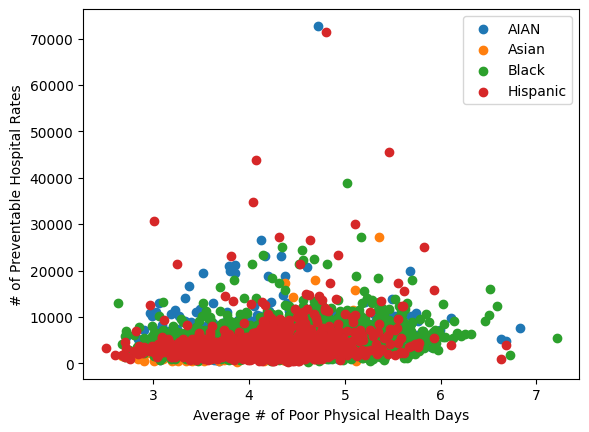

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

for eth in ethnicities[:-2]:
    y = np.array(hospital_prevention[eth])
    x = np.array(health_df['Average # of Poor Physical Health Days'])
    ax.scatter(x, y)

ax.set_xlabel('Average # of Poor Physical Health Days')
ax.set_ylabel('# of Preventable Hospital Rates')
ax.legend(ethnicities)


plt.show()


In general, if we look at a visualization of all races,
we tend to find that the relationship between Poor Physical Health Days and the
of Preventable Hospital rates tend to be similar, with whites and blacks
having a slight edge a lengthier poor physical health days.
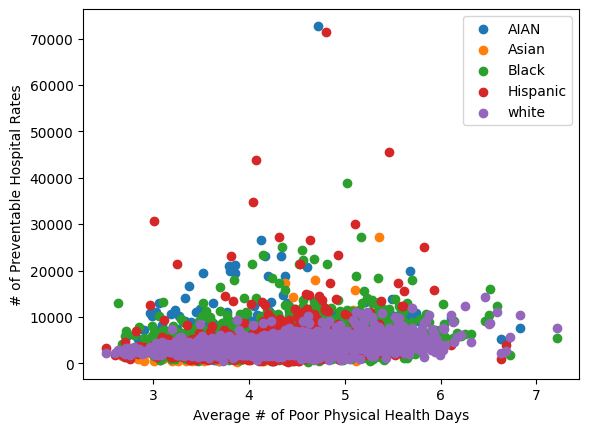

# Additional Research

## An increase in college students is predicted to cause an increase of Calmedia Cases.

In [ ]:
%matplotlib inline

import pandas as pd
import altair as alt
from altair import Chart, X, Y, Color, Scale
from vega_datasets import data
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
import altair as alt
import requests
matplotlib.style.use('ggplot')
sbn.set_style("whitegrid")
import json
import pickle
import scipy
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [ ]:
def remove_unnamed(df):
  """Solution found on https://stackoverflow.com/questions/40839609/rename-unnamed-multiindex-columns-in-pandas-dataframe"""
  for i, columns in enumerate(df.columns.levels):
    new_columns = columns.tolist()
    for j, row in enumerate(new_columns):
      if "Unnamed: " in row:
        new_columns[j] = ""
    if pd.__version__ < "0.21.0":
      df.columns.set_levels(new_columns, level=i, inplace=True)
    else:
      df = df.rename(columns=dict(zip(columns.tolist(), new_columns)),
                     level=i)
  return df

In [ ]:
import pandas as pd

names = ['Outcomes & Factors Rankings', 'Outcomes & Factors SubRankings', 'Additional Measure Data', 'Ranked Measure Data']

def filter_dataset(name):
  """Cleans up our dataset"""
  rank_data = pd.read_excel('/content/2022 County Health Rankings Data - v1 (1).xlsx', sheet_name=name, header=[0, 1])

  return rank_data

all_data_sets = []

for i in range(4):
  all_data_sets.append(remove_unnamed(filter_dataset(names[i])))

ranks = all_data_sets[0]
sub_ranks = all_data_sets[1]
additional_data = all_data_sets[2]
ranked_data = all_data_sets[3]

In [ ]:
(ranked_data['Physical inactivity']['% Physically Inactive']).corr(ranked_data['Premature death']['Deaths'])

-0.1058334075647091

In [ ]:
(ranked_data['Children in single-parent households']['# Children in Single-Parent Households']).corr(ranked_data['Some college']['% Some College'])

0.09452597951037893

In [ ]:
(ranked_data['Sexually transmitted infections']['# Chlamydia Cases']).corr(ranked_data['Some college']['% Some College'])

0.11037478836685687

In [ ]:
chl_cases = pd.DataFrame({
    '# Chlamydia Cases': ranked_data['Sexually transmitted infections']['# Chlamydia Cases'],
    '% Some College': ranked_data['Some college']['% Some College'],
    'Premature Deaths': ranked_data['Premature death']['Deaths']
})

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression, BayesianRidge, RANSACRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split

chl_cases.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(chl_cases[['# Chlamydia Cases', '% Some College']], chl_cases['Premature Deaths'], test_size=0.20, random_state=997)
clf = KernelRidge()
clf.fit(X_train,y_train)

KernelRidge()

In [ ]:
chl_cases['predictions'] = clf.predict(chl_cases[['# Chlamydia Cases', '% Some College']])

In [ ]:
chl_cases[chl_cases['predictions'] == 0]

Empty DataFrame
Columns: [# Chlamydia Cases, % Some College, Premature Deaths, predictions]
Index: []

In [ ]:
chl_cases

# Chlamydia Cases  % Some College  Premature Deaths   predictions
0               31228.0       61.575284           88086.0  59908.157864
1                 323.0       60.721736             836.0   1066.811913
2                 750.0       65.532108            3377.0   1915.515983
3                 221.0       38.355755             539.0    706.183463
4                 121.0       37.770409             460.0    511.451841
...                 ...             ...               ...           ...
3188              148.0       61.926416             599.0    742.630598
3189               78.0       76.039794             111.0    714.407790
3190               54.0       57.703349             287.0    532.250125
3191               15.0       62.403952             115.0    492.989888
3192                9.0       58.281829              75.0    450.889073

[2904 rows x 4 columns]

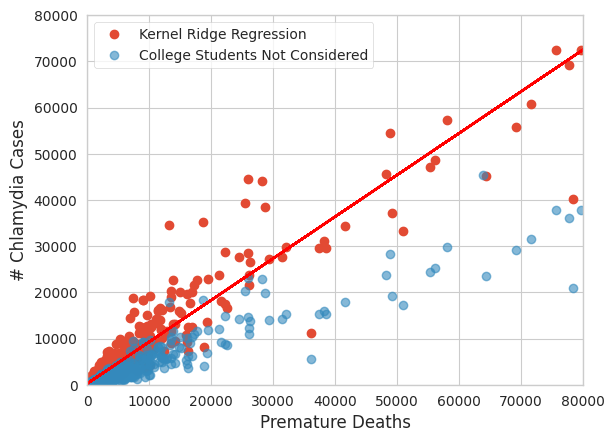

In [ ]:
from sklearn.model_selection import GridSearchCV

fig, ax = plt.subplots()

ax.plot(chl_cases['Premature Deaths'], chl_cases['predictions'], "o")
ax.plot(chl_cases['Premature Deaths'], chl_cases['# Chlamydia Cases'], 'o', alpha=0.6)
ax.set_xlabel(xlabel='Premature Deaths')
ax.set_ylabel(ylabel='# Chlamydia Cases')
ax.axis([0, 80000, 0, 80000])
ax.grid(True)


m, b = np.polyfit(chl_cases['Premature Deaths'], chl_cases['predictions'], 1)
ax.plot(chl_cases['Premature Deaths'], m*chl_cases['Premature Deaths']+b, color="red")

ax.legend(["Kernel Ridge Regression", "College Students Not Considered"])

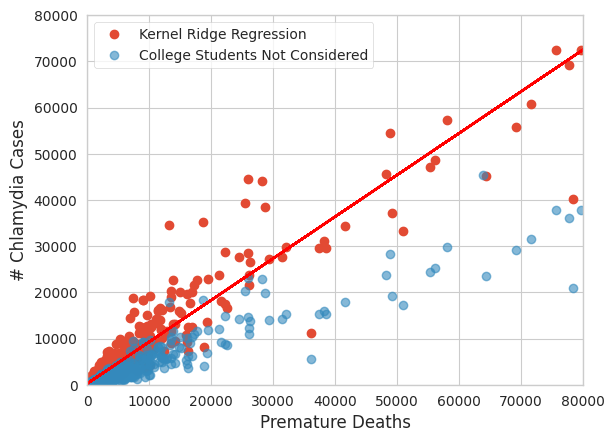

The data visualization shows us that as the # of Chlamydia cases increases,
the premature death rate also tends to increase.
Using Kernel Ridge Regression, the algorithm shows us that if we consider the more people take courses in college, it predicts that we may have an increase of chlamydia cases and death rates the more college students we have.